In [2]:
import numpy as np 
import os 
import xarray as xr
import pandas as pd
#from scipy.io import savemat
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib as mpl
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
max_display_options = ['display.max_seq_items', 'display.max_colwidth', 'display.max_dir_items', 'display.max_columns', 'display.max_rows']
for param in range(0,len(max_display_options)):
    pd.set_option(max_display_options[param], None)

---

## Using merged all days file to check data availability for campaign

In [22]:
all_days_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
all_days_filepath_load = xr.open_dataset(all_days_filepath)
df_alldays = all_days_filepath_load.to_dataframe()
df_alldays.set_index('time_local', inplace=True)

# Define which variables we need to make sure don't have Nans/ negs since we'll be using then as constraints in F0AM: 
# True means constrain
need2fill= {'Br2_CIMS':True,
        'BrO_CIMS':True,
        'Cl2_CIMS':True,
        'ClNO2_CIMS':True,
        'BrCl_CIMS':True,
        'NCl3_CIMS':False,
        'File_Index':False,
        'NO_LIF':True,
        'NO2_LIF':True,
        'NOy_LIF':False,
        'ACCURACY_1sigma_NO':False,
        'ACCURACY_1sigma_NO2':False,
        'ACCURACY_1sigma_NOy':False,
        'N2O5_CIMS':True,
        'C4H7NO5_CIMS':False,
        'ISOPN_CIMS':False,
        'C5H10O3_CIMS':False,
        'C5H9NO5_CIMS':False,
        'C10H17NO4_CIMS':False,
        'HNO3_CIMS':True,
        'Methanol_PTR':True,
        'Acetonitrile_PTR':True,
        'Acetaldehyde_PTR':True,
        'Ethanol_PTR':True,
        'Methanethiol_PTR':False,
        'Acrolein_PTR':True,
        'Acetone_Propanal_PTR':False,
        'DMS_PTR':True,
        'Isoprene_PTR':True,
        'MVK_MACR_PTR':True,
        'Benzene_PTR':True,
        'Toluene_PTR':True,
        'Styrene_PTR':True,
        'Benzaldehyde_PTR':True,
        'C8Aromatics_PTR':False,
        'C9Aromatics_PTR':False,
        'Naphthalene_PTR':False,
        'Octanal_PTR':False,
        'Monoterpenes_PTR':True,
        'Nonanal_PTR':False,
        'C7H4ClF3_PTR':False,
        'D5_siloxane_PTR':False,
        'PAN_CIMS':True,
        'APAN_CIMS':False,
        'PPN_CIMS':True,
        'HCOOH_CIMS':True,
        'HONO_CIMS':True,
        'O3_ppbv':True,
        'Altitude_m':False,
        'Course_deg':False,
        'GndSpd_ms':False,
        'Heading_deg':False,
        'Lat':False,
        'Lon':False,
        'Temp_K':True,
        'Pressure_mb':True,
        'WindDir_deg':False,
        'WindSpd_ms':True,
        'jNO2_meas':True,
        'CO2_Piccaro':False,
        'CH4_Piccaro':True,
        'CO_Piccaro':True,
        'H2O_Piccaro':False,
        'HCHO_CRDS':True,
        'H2O_CRDS':True,
        'CH4_CRDS':True,
        'Time_Start_WAS':False,
        'Time_Stop_WAS':False,
        'Time_Mid_WAS':False,
        'Acetone_WAS':False,
        'Acrolein_WAS':False,
        'Benzene_WAS':False,
        'C2Cl4_WAS':False,
        'C2HCl3_WAS':False,
        'CCl4_WAS':False,
        'CF2Cl2_WAS':False,
        'CFCl3_WAS':False,
        'CH2Cl2_WAS':False,
        'CH3Br_WAS':False,
        'CycloPentane_WAS':False,
        'Ethyl_WAS':False,
        'Ethane_WAS':False,
        'Ethene_WAS':False,
        'Ethyne_WAS':False,
        'Furan_WAS':False,
        'Isoprene_WAS':False,
        'Limonene_WAS':False,
        'MACR_WAS':False,
        'MethylCycloHexane_WAS':False,
        'MethylCycloPentane_WAS':False,
        'Propane_WAS':False,
        'Propene_WAS':False,
        'Toluene_WAS':False,
        'Alpha_Pinene_WAS':False,
        'Beta_Pinene_WAS':False,
        'c2Butene_WAS':False,
        'c2Pentene_WAS':False,
        'iButane_WAS':False,
        'iPentane_WAS':False,
        'iPropylBenzene_WAS':False,
        'iPropylONO2_WAS':False,
        'm_p_Xylene_WAS':False,
        'nButane_WAS':False,
        'nDecane_WAS':False,
        'nHeptane_WAS':False,
        'nHexane_WAS':False,
        'nNonane_WAS':False,
        'nOctane_WAS':False,
        'nPentane_WAS':False,
        'nPropylBenzene_WAS':False,
        'nPropylONO2_WAS':False,
        'o_Xylene_WAS':False,
        't2Butene_WAS':False,
        't2Pentene_WAS':False,
        'x123_TriMethylBenzene_WAS':False,
        'x124_TriMethylBenzene_WAS':False,
        'x135_TriMethylBenzene_WAS':False,
        'x13_Butadiene_WAS':False,
        'x1_Butene_WAS':False,
        'x1_Pentene_WAS':False,
        'x224_TriMethylPentane_WAS':False,
        'x22_DiMethylButane_WAS':False,
        'x2_EthylToluene_WAS':False,
        'x2_MethylPentane_WAS':False,
        'x3_MethylPentane_WAS':False,
        'x3_x4_EthylToluene_WAS':False,
        'RH_percent':True,
        'AOD':False,
        'jNO2':True,
        'jBrCl':True,
        'jBr2':True,
        'jCCl4':True,
        'jCH2Oa':True,
        'jCH2Ob':True,
        'jClNO2':True,
        'jClOa':True,
        'jClOb':True,
        'jCl2':True,
        'jHNO2':True,
        'jHNO3':True,
        'jI2':True,
        'jNO3a':True,
        'jNO3b':True,
        'jN2O5':True,
        'jO3':True,
        'Time_Start_POPS':False,
        'Time_Stop_POPS':False,
        'Press_mb_POPS':False,
        'Temp_C_POPS':False,
        'Aerosol_conc_POPS':False,
        'Surface_area_conc_POPS':False,
        'Volume_density_POPS':False,
        'Effective_radius_POPS':False,
        'Extinction_POPS':False,
        'Particle_conc_bin01_POPS':False,
        'Particle_conc_bin02_POPS':False,
        'Particle_conc_bin03_POPS':False,
        'Particle_conc_bin04_POPS':False,
        'Particle_conc_bin05_POPS':False,
        'Particle_conc_bin06_POPS':False,
        'Particle_conc_bin07_POPS':False,
        'Particle_conc_bin08_POPS':False,
        'Particle_conc_bin09_POPS':False,
        'Particle_conc_bin10_POPS':False,
        'Particle_conc_bin11_POPS':False,
        'Particle_conc_bin12_POPS':False,
        'Particle_conc_bin13_POPS':False,
        'Particle_conc_bin14_POPS':False,
        'Particle_conc_bin15_POPS':False,
        'Particle_conc_bin16_POPS':False,
        'Particle_conc_bin17_POPS':False,
        'Particle_conc_bin18_POPS':False,
        'Particle_conc_bin19_POPS':False,
        'Particle_conc_bin20_POPS':False,
        'Particle_conc_bin21_POPS':False,
        'Particle_conc_bin22_POPS':False,
        'Particle_conc_bin23_POPS':False,
        'Particle_conc_bin24_POPS':False,
        'Particle_conc_bin25_POPS':False,
        'Particle_conc_bin26_POPS':False,
        'Particle_conc_bin27_POPS':False,
        'Particle_conc_bin28_POPS':False,
        'Particle_conc_bin29_POPS':False,
        'Particle_conc_bin30_POPS':False,
        'Particle_conc_bin31_POPS':False,
        'Particle_conc_bin32_POPS':False,
        'Particle_conc_bin33_POPS':False,
        'Particle_conc_bin34_POPS':False,
        'Particle_conc_bin35_POPS':False,
        'Particle_conc_bin36_POPS':False}

# Get names of vars we need to fill nans in: 
vars2fill=[key for key,value in need2fill.items() if value ==True]

In [23]:
df_foam_allvars=pd.DataFrame(index=df_alldays.index)

for col in vars2fill:
    if col in df_alldays.columns:
    # Everything that was a NaN or negative is assigned a 0, positive values are assigned a 1
        df_foam_allvars[col] = np.where((df_alldays[col] > 0) & (~df_alldays[col].isna()), 1, 0 ) 
    else:
        df_foam_allvars[col]= 0

df_allvars_transposed=df_foam_allvars.T

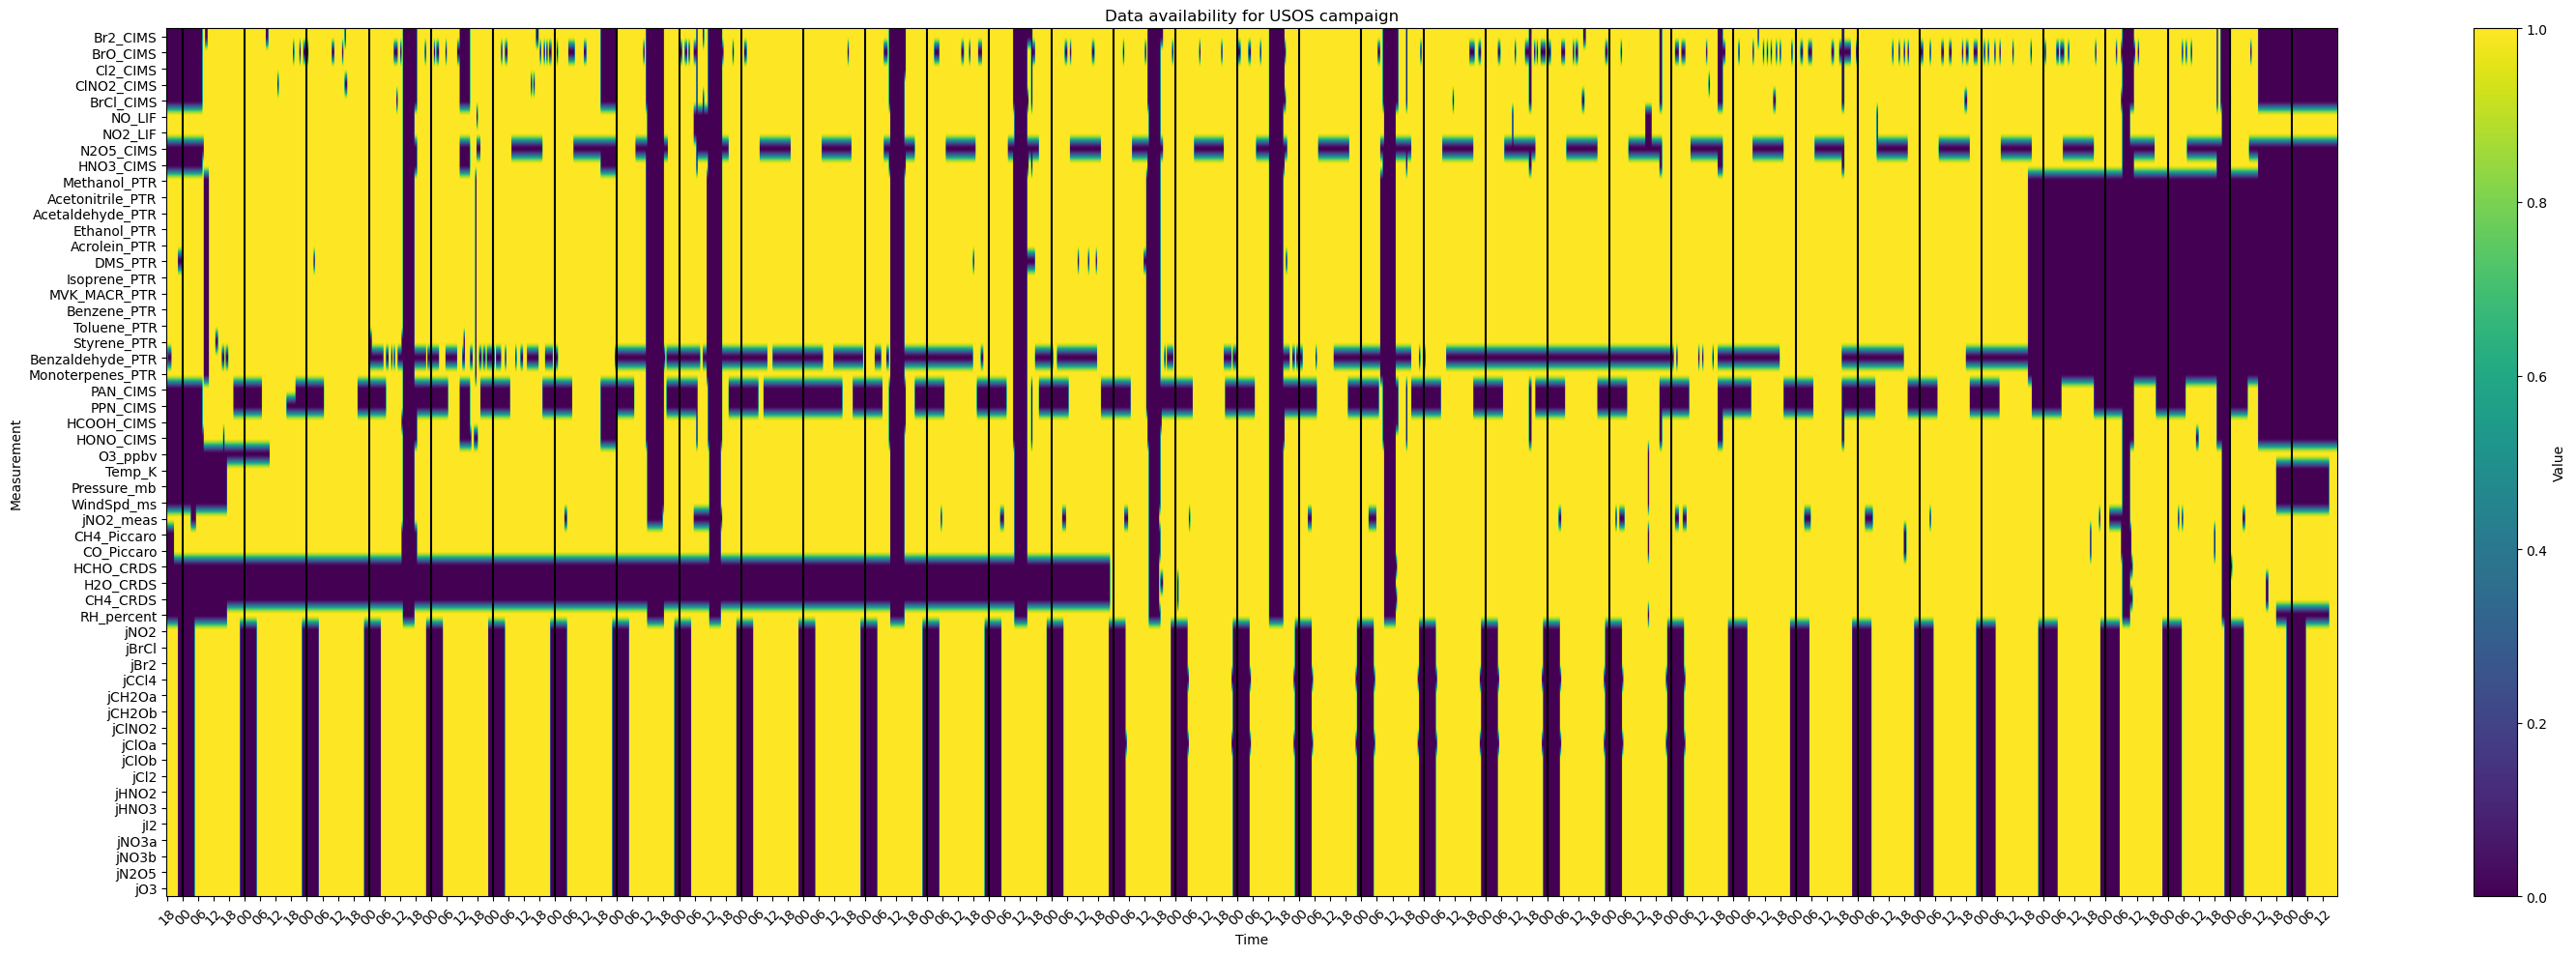

In [3]:
# Create the heatmap using imshow
plt.figure(figsize=(30, 10))
plt.rcParams['figure.dpi'] = 300
#ax0 = fig1.add_subplot(111)
#ax.grid(color='black')
plt.imshow(df_allvars_transposed, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_allvars_transposed.columns),12), labels=df_allvars_transposed.columns.strftime('%H')[0::12])
plt.yticks(ticks=np.arange(len(df_allvars_transposed.index)), labels=df_allvars_transposed.index)

for pos in range(12,len(df_allvars_transposed.columns),48):
    plt.axvline(pos, color = 'black')
#    plt.axvline(df_allvars_transposed.columns.strftime('%H%M')[12::48], color = 'black')           
# Add color bar
plt.colorbar(label='Value')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.title('Data availability for USOS campaign')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))

TypeError: Dimensions of C (2, 1) should be one smaller than X(2) and Y(2) while using shading='flat' see help(pcolormesh)

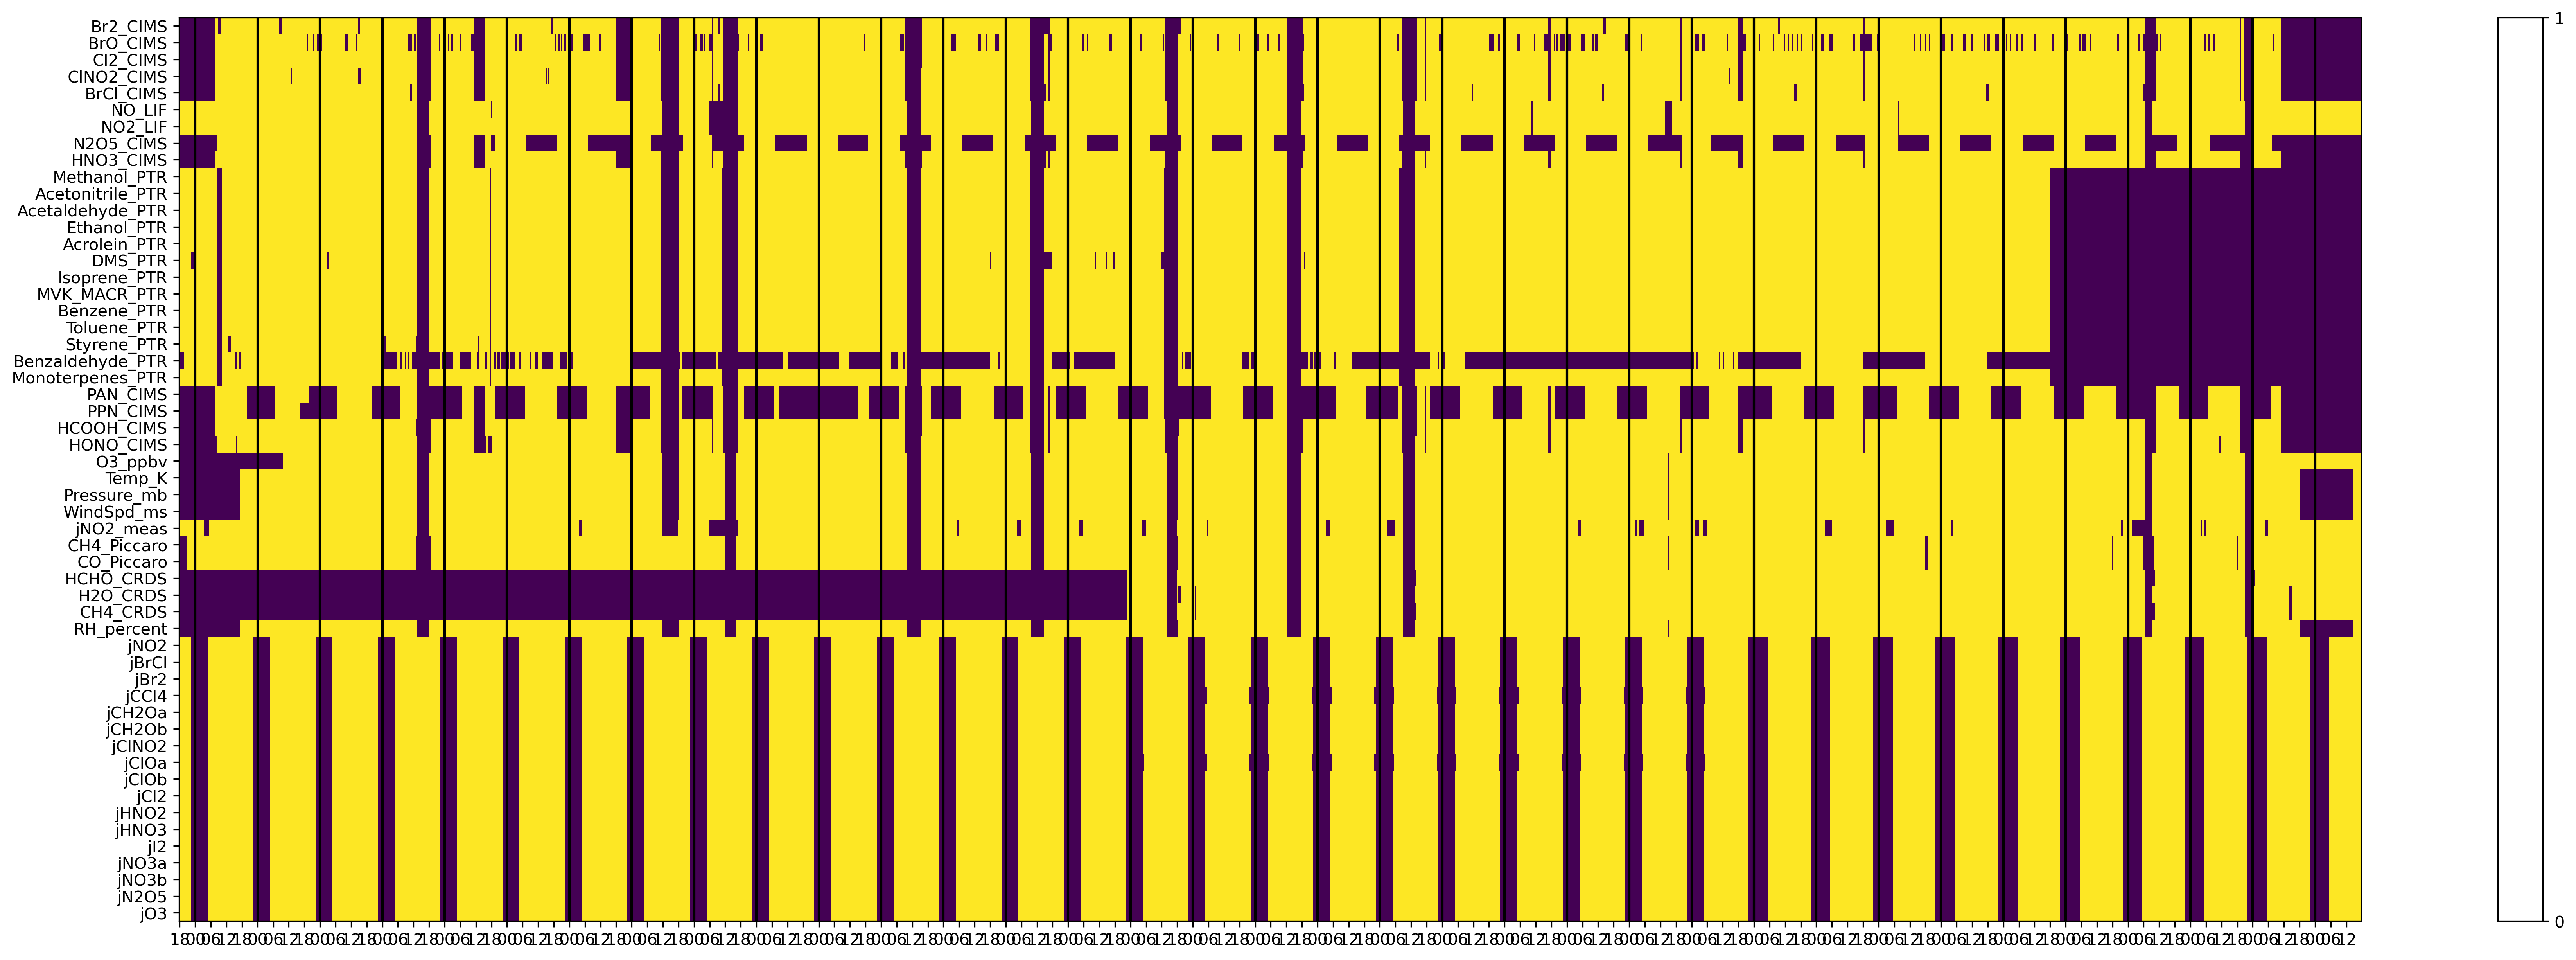

In [109]:
# Create the heatmap using imshow
fig,ax = plt.subplots(figsize=(30, 10), dpi=300)
img = ax.imshow(df_allvars_transposed, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_allvars_transposed.columns),12), labels=df_allvars_transposed.columns.strftime('%H')[0::12])
plt.yticks(ticks=np.arange(len(df_allvars_transposed.index)), labels=df_allvars_transposed.index)

for pos in range(12,len(df_allvars_transposed.columns),48):
    plt.axvline(pos, color = 'black')
#    plt.axvline(df_allvars_transposed.columns.strftime('%H%M')[12::48], color = 'black')           

# Add color bar
cmap = mpl.cm.viridis
bounds = [0,1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cbar = plt.colorbar(img,cmap=cmap,norm=norm, boundaries=bounds, ticks = [0,1], values = [0,1])


# Set labels and title
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.title('Data availability for USOS campaign')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))

/tmp/ipykernel_402198/3546446852.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(df_allvars_transposed, aspect='auto', cmap=plt.cm.get_cmap('viridis',2))


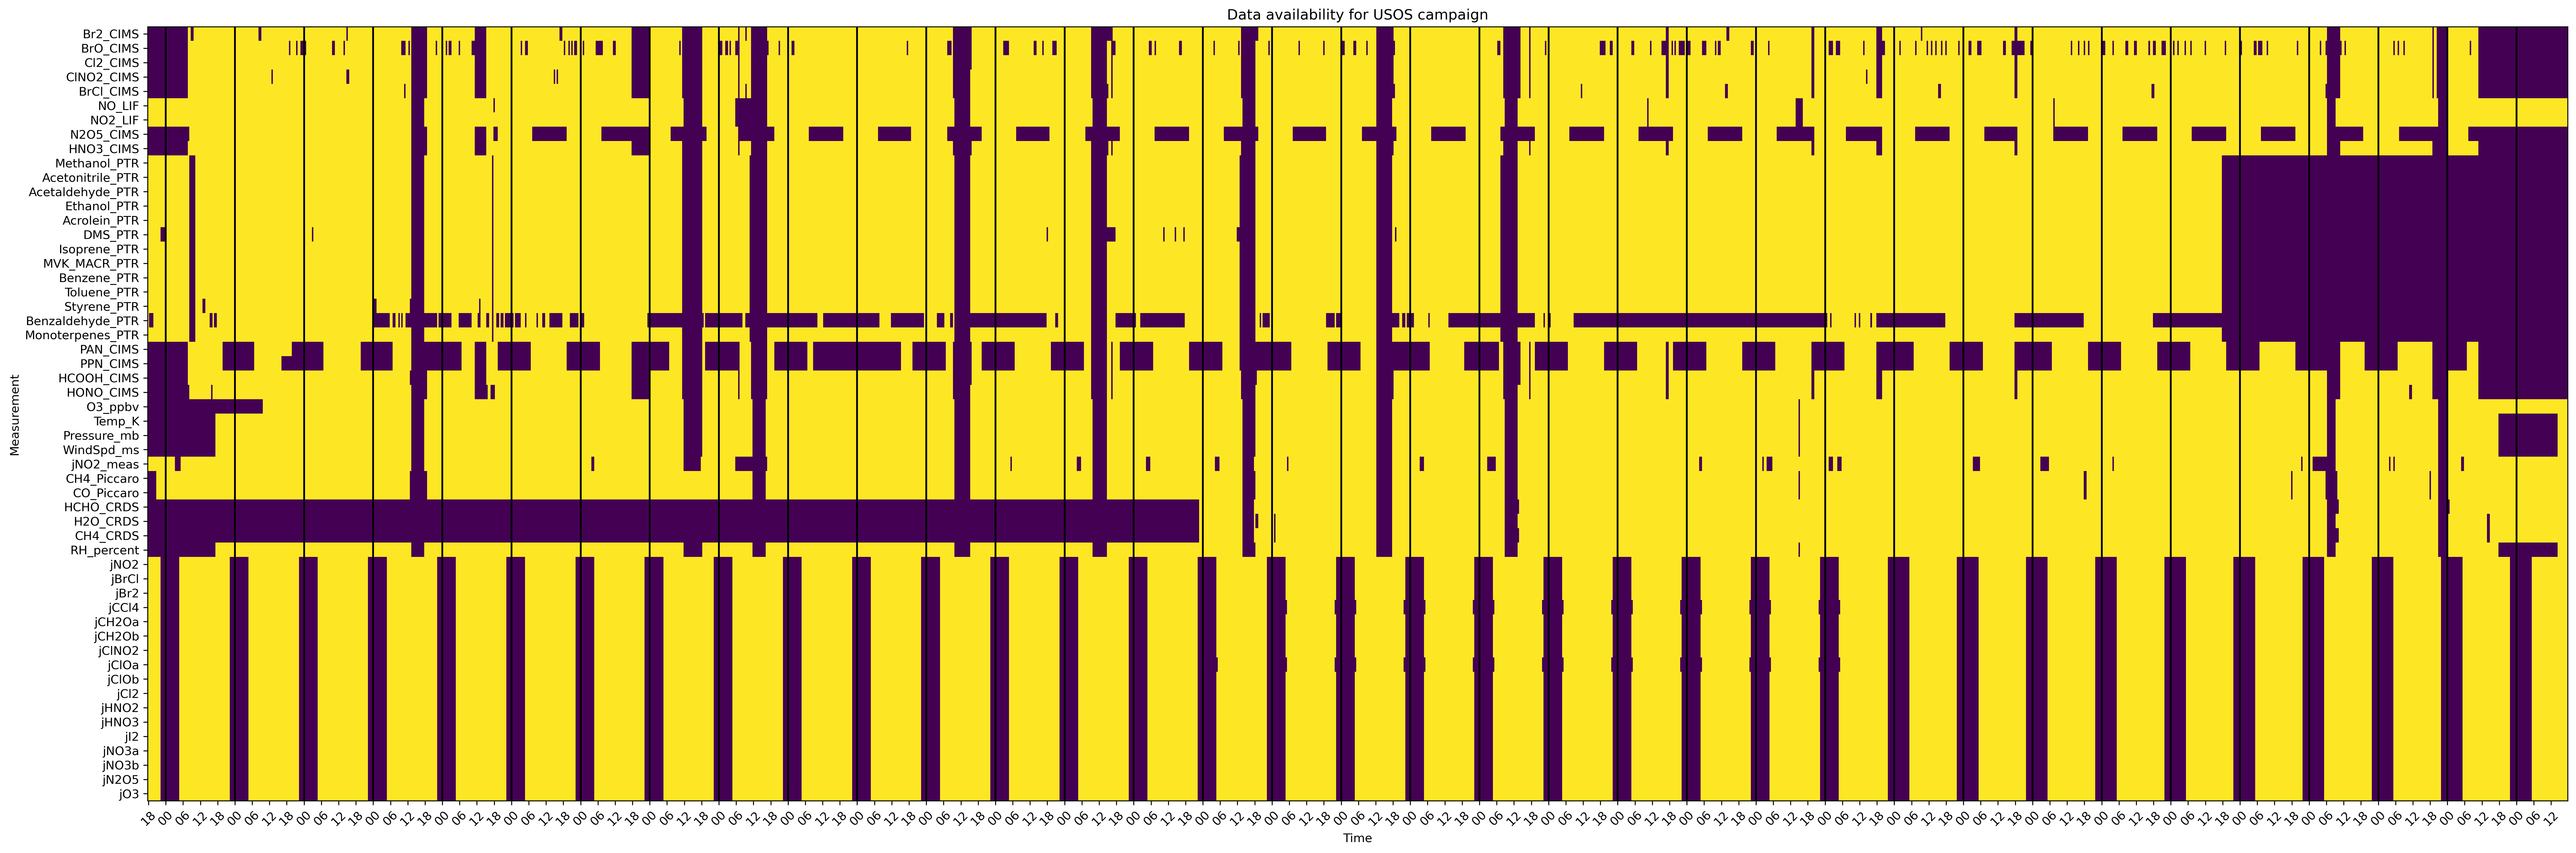

In [82]:
# Create the heatmap using imshow
plt.figure(figsize=(30, 10))
plt.rcParams['figure.dpi'] = 300
plt.imshow(df_allvars_transposed, aspect='auto', cmap=plt.cm.get_cmap('viridis',2))
plt.clim(0,1);
# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_allvars_transposed.columns),12), labels=df_allvars_transposed.columns.strftime('%H')[0::12])
plt.yticks(ticks=np.arange(len(df_allvars_transposed.index)), labels=df_allvars_transposed.index)

for pos in range(12,len(df_allvars_transposed.columns),48):
    plt.axvline(pos, color = 'black')
#    plt.axvline(df_allvars_transposed.columns.strftime('%H%M')[12::48], color = 'black')           


# Set labels and title
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.title('Data availability for USOS campaign')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))

/uufs/chpc.utah.edu/common/home/u1545774/MySoftware/micromamba/envs/phdresearch/lib/python3.12/site-packages/matplotlib/transforms.py:2670: RuntimeWarning: divide by zero encountered in scalar divide
  y_scale = 1.0 / inh
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


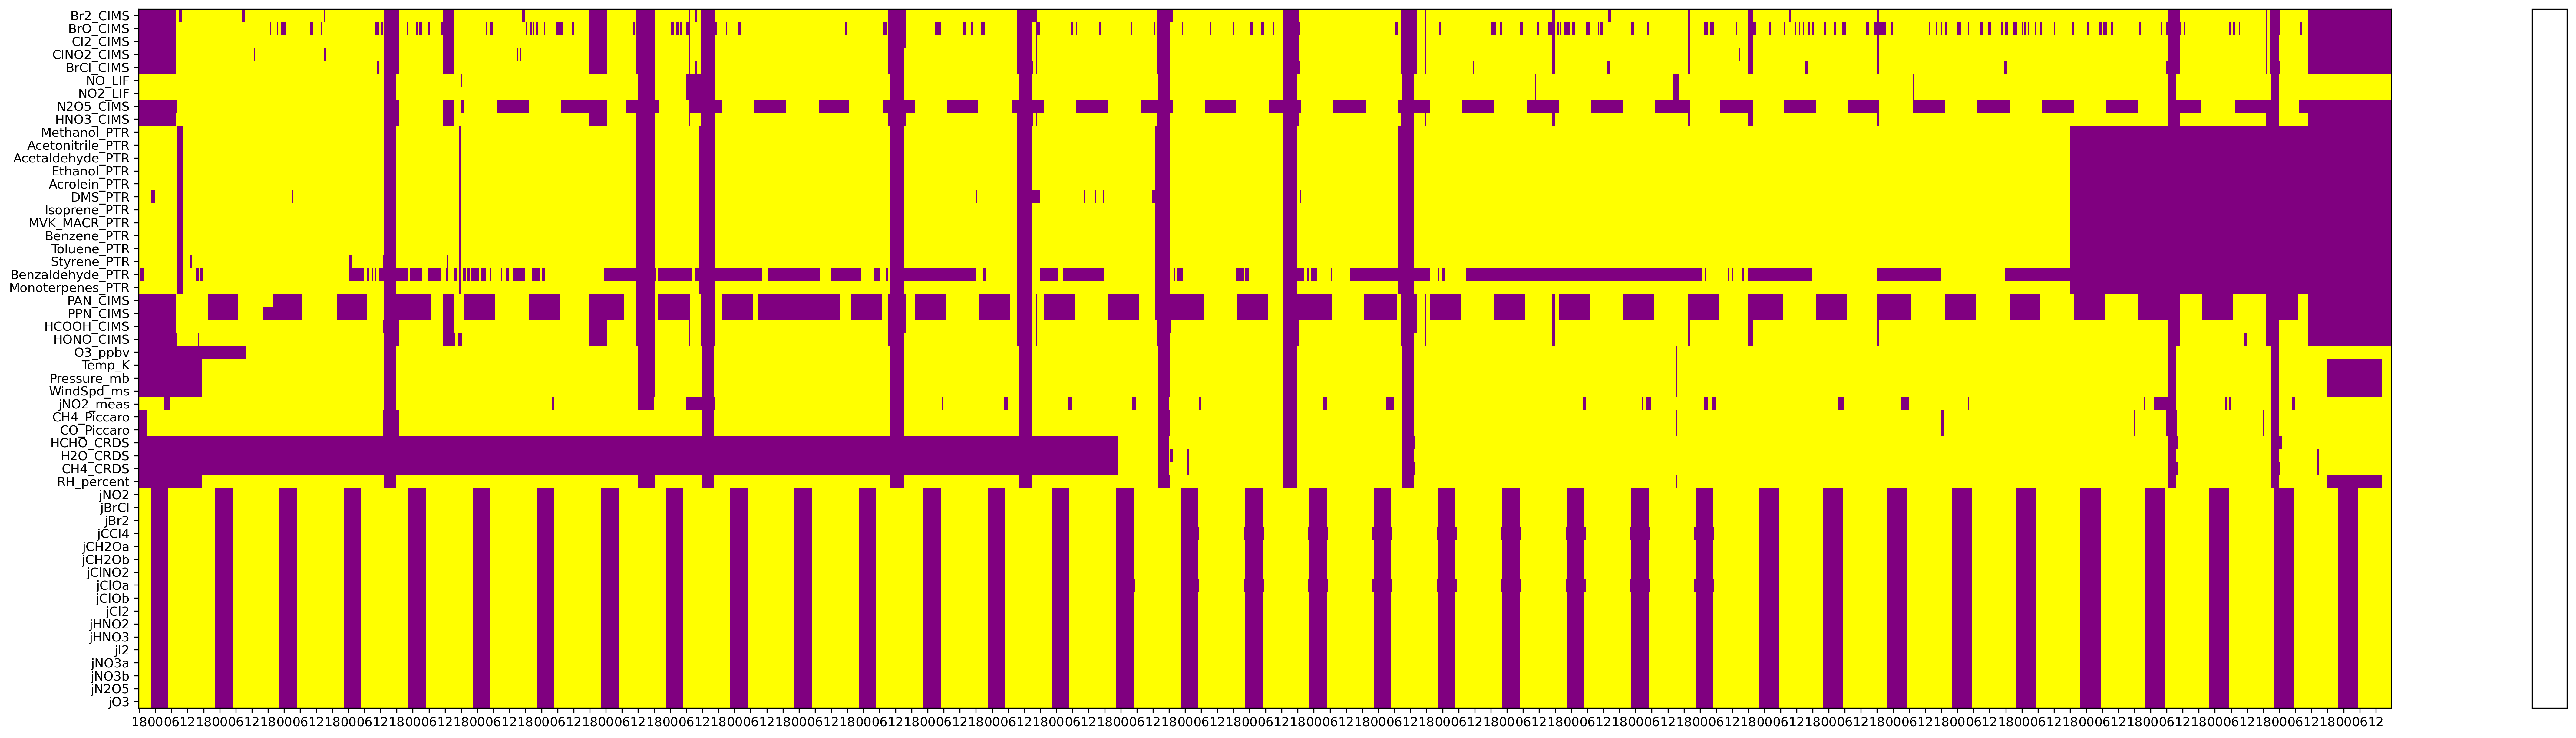

In [111]:
plt.figure(figsize=(40, 10))
plt.rcParams['figure.dpi'] = 300
cmap = colors.ListedColormap(['purple', 'yellow'])

bounds=[0,1]
norm = colors.BoundaryNorm(bounds, cmap.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(df_allvars_transposed,
                    cmap=cmap, norm=norm, aspect='auto')

plt.xticks(ticks=range(0,len(df_allvars_transposed.columns),12), labels=df_allvars_transposed.columns.strftime('%H')[0::12])
plt.yticks(ticks=np.arange(len(df_allvars_transposed.index)), labels=df_allvars_transposed.index)

# make a color bar
plt.colorbar(ticks = [0,1], values=[0,1])
#cb = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0,1], values=[0,1], pad = 0.01)

#plt.savefig('redwhite.png')
plt.show()

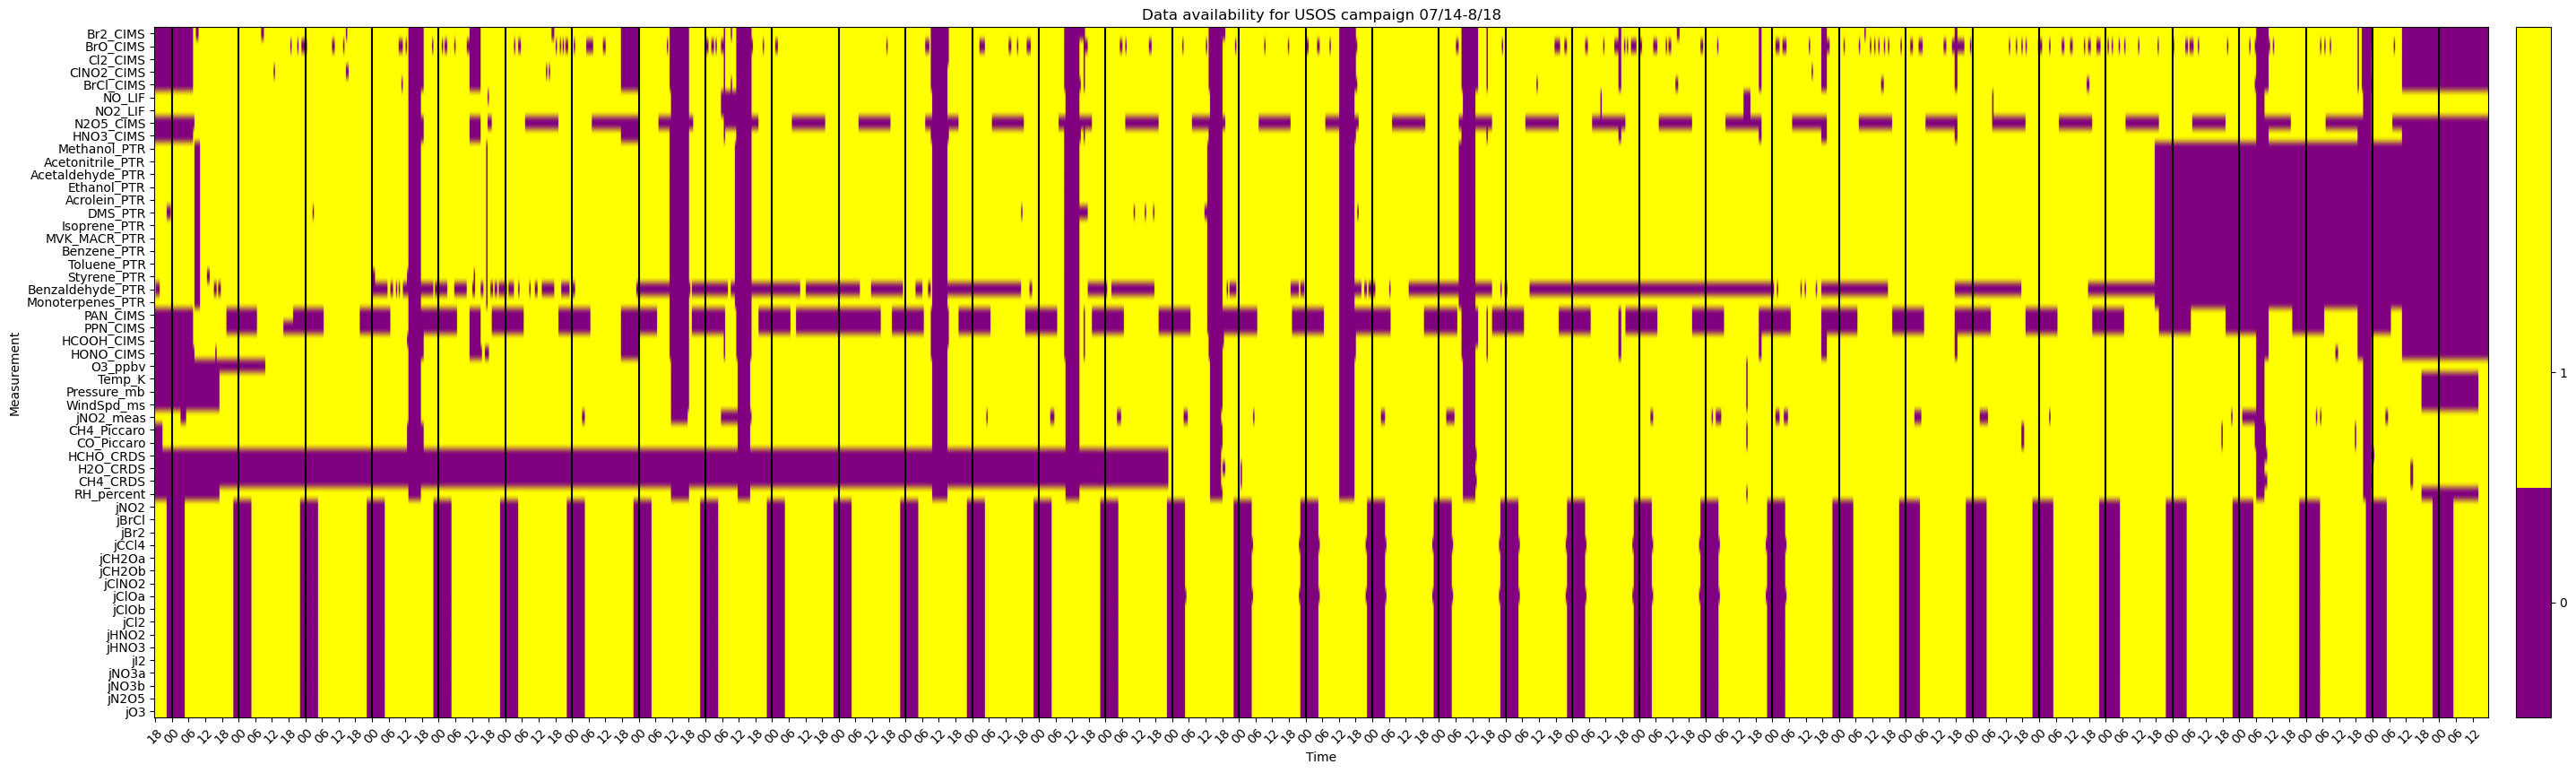

In [4]:
plt.figure(figsize=(40, 10))
plt.rcParams['figure.dpi'] = 300
cmap = colors.ListedColormap(['purple', 'yellow'])


# tell imshow about color map so that only set colors are used
plt.imshow(df_allvars_transposed,
                    cmap=cmap, aspect='auto')

plt.xticks(ticks=range(0,len(df_allvars_transposed.columns),12), labels=df_allvars_transposed.columns.strftime('%H')[0::12], rotation =45)
plt.yticks(ticks=np.arange(len(df_allvars_transposed.index)), labels=df_allvars_transposed.index)

for pos in range(12,len(df_allvars_transposed.columns),48):
    plt.axvline(pos, color = 'black')
    
# make a color bar
plt.colorbar(ticks = [0,1], values=[0,1,2], pad=0.01)
#cb = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0,1], values=[0,1], pad = 0.01)
plt.title('Data availability for USOS campaign 07/14-8/18')
plt.xlabel('Time')
plt.ylabel('Measurement')

#plt.savefig('redwhite.png')
plt.show()

---


## Data availability for subset days (first test: 08/05 - 08/08)

### Notes: 
* recall that the time is in local time 

In [25]:
#load file for all dates
all_days_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
all_days_filepath_load = xr.open_dataset(all_days_filepath)
df_alldays = all_days_filepath_load.to_dataframe()
df_alldays.set_index('time_local', inplace=True)

# Define which variables we need to make sure don't have Nans/ negs since we'll be using then as constraints in F0AM: 
# True means constrain
need2fill= {'Br2_CIMS':True,
        'BrO_CIMS':True,
        'Cl2_CIMS':True,
        'ClNO2_CIMS':True,
        'BrCl_CIMS':True,
        'NCl3_CIMS':False,
        'File_Index':False,
        'NO_LIF':True,
        'NO2_LIF':True,
        'NOy_LIF':False,
        'ACCURACY_1sigma_NO':False,
        'ACCURACY_1sigma_NO2':False,
        'ACCURACY_1sigma_NOy':False,
        'N2O5_CIMS':True,
        'C4H7NO5_CIMS':False,
        'ISOPN_CIMS':False,
        'C5H10O3_CIMS':False,
        'C5H9NO5_CIMS':False,
        'C10H17NO4_CIMS':False,
        'HNO3_CIMS':True,
        'Methanol_PTR':True,
        'Acetonitrile_PTR':True,
        'Acetaldehyde_PTR':True,
        'Ethanol_PTR':True,
        'Methanethiol_PTR':False,
        'Acrolein_PTR':True,
        'Acetone_Propanal_PTR':False,
        'DMS_PTR':True,
        'Isoprene_PTR':True,
        'MVK_MACR_PTR':True,
        'Benzene_PTR':True,
        'Toluene_PTR':True,
        'Styrene_PTR':True,
        'Benzaldehyde_PTR':True,
        'C8Aromatics_PTR':False,
        'C9Aromatics_PTR':False,
        'Naphthalene_PTR':False,
        'Octanal_PTR':False,
        'Monoterpenes_PTR':True,
        'Nonanal_PTR':False,
        'C7H4ClF3_PTR':False,
        'D5_siloxane_PTR':False,
        'PAN_CIMS':True,
        'APAN_CIMS':False,
        'PPN_CIMS':True,
        'HCOOH_CIMS':True,
        'HONO_CIMS':True,
        'O3_ppbv':True,
        'Altitude_m':False,
        'Course_deg':False,
        'GndSpd_ms':False,
        'Heading_deg':False,
        'Lat':False,
        'Lon':False,
        'Temp_K':True,
        'Pressure_mb':True,
        'WindDir_deg':False,
        'WindSpd_ms':True,
        'jNO2_meas':True,
        'CO2_Piccaro':False,
        'CH4_Piccaro':True,
        'CO_Piccaro':True,
        'H2O_Piccaro':False,
        'HCHO_CRDS':True,
        'H2O_CRDS':True,
        'CH4_CRDS':True,
        'Time_Start_WAS':False,
        'Time_Stop_WAS':False,
        'Time_Mid_WAS':False,
        'Acetone_WAS':False,
        'Acrolein_WAS':False,
        'Benzene_WAS':False,
        'C2Cl4_WAS':False,
        'C2HCl3_WAS':False,
        'CCl4_WAS':False,
        'CF2Cl2_WAS':False,
        'CFCl3_WAS':False,
        'CH2Cl2_WAS':False,
        'CH3Br_WAS':False,
        'CycloPentane_WAS':False,
        'Ethyl_WAS':False,
        'Ethane_WAS':False,
        'Ethene_WAS':False,
        'Ethyne_WAS':False,
        'Furan_WAS':False,
        'Isoprene_WAS':False,
        'Limonene_WAS':False,
        'MACR_WAS':False,
        'MethylCycloHexane_WAS':False,
        'MethylCycloPentane_WAS':False,
        'Propane_WAS':False,
        'Propene_WAS':False,
        'Toluene_WAS':False,
        'Alpha_Pinene_WAS':False,
        'Beta_Pinene_WAS':False,
        'c2Butene_WAS':False,
        'c2Pentene_WAS':False,
        'iButane_WAS':False,
        'iPentane_WAS':False,
        'iPropylBenzene_WAS':False,
        'iPropylONO2_WAS':False,
        'm_p_Xylene_WAS':False,
        'nButane_WAS':False,
        'nDecane_WAS':False,
        'nHeptane_WAS':False,
        'nHexane_WAS':False,
        'nNonane_WAS':False,
        'nOctane_WAS':False,
        'nPentane_WAS':False,
        'nPropylBenzene_WAS':False,
        'nPropylONO2_WAS':False,
        'o_Xylene_WAS':False,
        't2Butene_WAS':False,
        't2Pentene_WAS':False,
        'x123_TriMethylBenzene_WAS':False,
        'x124_TriMethylBenzene_WAS':False,
        'x135_TriMethylBenzene_WAS':False,
        'x13_Butadiene_WAS':False,
        'x1_Butene_WAS':False,
        'x1_Pentene_WAS':False,
        'x224_TriMethylPentane_WAS':False,
        'x22_DiMethylButane_WAS':False,
        'x2_EthylToluene_WAS':False,
        'x2_MethylPentane_WAS':False,
        'x3_MethylPentane_WAS':False,
        'x3_x4_EthylToluene_WAS':False,
        'RH_percent':True,
        'AOD':False,
        'jNO2':True,
        'jBrCl':True,
        'jBr2':True,
        'jCCl4':True,
        'jCH2Oa':True,
        'jCH2Ob':True,
        'jClNO2':True,
        'jClOa':True,
        'jClOb':True,
        'jCl2':True,
        'jHNO2':True,
        'jHNO3':True,
        'jI2':True,
        'jNO3a':True,
        'jNO3b':True,
        'jN2O5':True,
        'jO3':True,
        'Time_Start_POPS':False,
        'Time_Stop_POPS':False,
        'Press_mb_POPS':False,
        'Temp_C_POPS':False,
        'Aerosol_conc_POPS':False,
        'Surface_area_conc_POPS':False,
        'Volume_density_POPS':False,
        'Effective_radius_POPS':False,
        'Extinction_POPS':False,
        'Particle_conc_bin01_POPS':False,
        'Particle_conc_bin02_POPS':False,
        'Particle_conc_bin03_POPS':False,
        'Particle_conc_bin04_POPS':False,
        'Particle_conc_bin05_POPS':False,
        'Particle_conc_bin06_POPS':False,
        'Particle_conc_bin07_POPS':False,
        'Particle_conc_bin08_POPS':False,
        'Particle_conc_bin09_POPS':False,
        'Particle_conc_bin10_POPS':False,
        'Particle_conc_bin11_POPS':False,
        'Particle_conc_bin12_POPS':False,
        'Particle_conc_bin13_POPS':False,
        'Particle_conc_bin14_POPS':False,
        'Particle_conc_bin15_POPS':False,
        'Particle_conc_bin16_POPS':False,
        'Particle_conc_bin17_POPS':False,
        'Particle_conc_bin18_POPS':False,
        'Particle_conc_bin19_POPS':False,
        'Particle_conc_bin20_POPS':False,
        'Particle_conc_bin21_POPS':False,
        'Particle_conc_bin22_POPS':False,
        'Particle_conc_bin23_POPS':False,
        'Particle_conc_bin24_POPS':False,
        'Particle_conc_bin25_POPS':False,
        'Particle_conc_bin26_POPS':False,
        'Particle_conc_bin27_POPS':False,
        'Particle_conc_bin28_POPS':False,
        'Particle_conc_bin29_POPS':False,
        'Particle_conc_bin30_POPS':False,
        'Particle_conc_bin31_POPS':False,
        'Particle_conc_bin32_POPS':False,
        'Particle_conc_bin33_POPS':False,
        'Particle_conc_bin34_POPS':False,
        'Particle_conc_bin35_POPS':False,
        'Particle_conc_bin36_POPS':False}

# Get names of vars we need to fill nans in: 
vars2fill=[key for key,value in need2fill.items() if value ==True]

In [26]:
#Take a subset of the days
subset_days = ['08-03','08-04','08-05','08-06','08-07','08-08']
df_subsetdays = df_alldays.sort_index().loc["2024-08-03":"2024-08-08"]

In [27]:
df_subset_avail=pd.DataFrame(index=df_subsetdays.index)

for col in vars2fill:
    if col in df_alldays.columns:
    # Everything that was a NaN or negative is assigned a 0, positive values are assigned a 1
        df_subset_avail[col] = np.where((df_subsetdays[col] > 0) & (~df_subsetdays[col].isna()), 1, 0 ) 
    else:
        df_subset_avail[col]= 0

df_transposed_subset=df_subset_avail.T

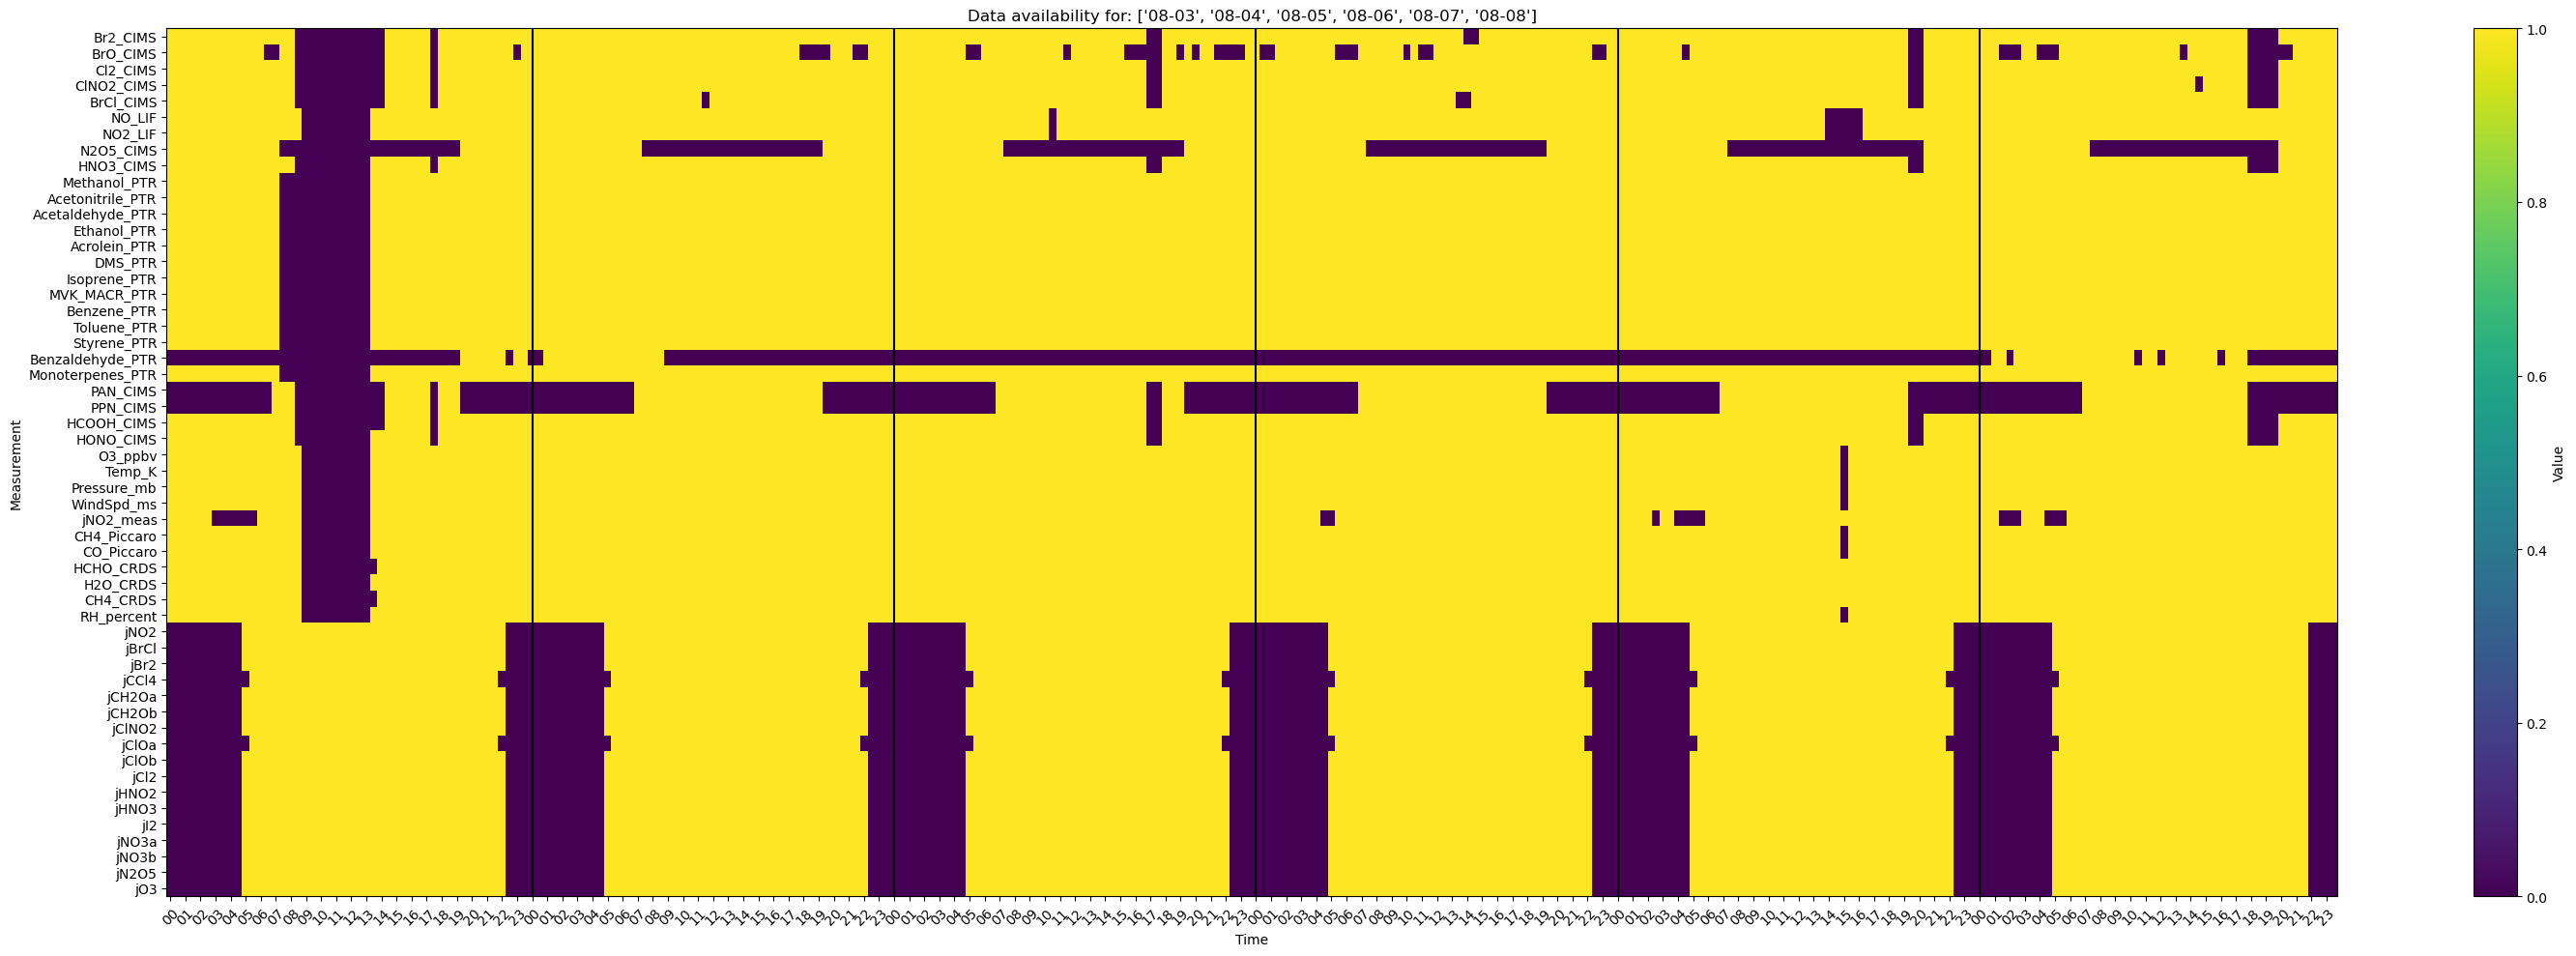

In [28]:
# Create the heatmap using imshow
fig1 = plt.figure(figsize=(30, 10))
ax0 = fig1.add_subplot(111)
plt.imshow(df_transposed_subset, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_transposed_subset.columns),2), labels=df_transposed_subset.columns.strftime('%H')[0::2])
plt.yticks(ticks=np.arange(len(df_transposed_subset.index)), labels=df_transposed_subset.index)

for pos in range(48,len(df_transposed_subset.columns),48):
    plt.axvline(pos, color = 'black')
            
# Add color bar
plt.colorbar(label='Value')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.title('Data availability for: ' + str(subset_days))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))

---

## Temperature values for subset of days

In [45]:
#load file for all dates
all_days_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
all_days_filepath_load = xr.open_dataset(all_days_filepath)
df_alldays = all_days_filepath_load.to_dataframe()
df_alldays.set_index('time_local', inplace=True)

# Define which variables we need to make sure don't have Nans/ negs since we'll be using then as constraints in F0AM: 
# True means constrain
need2fill= {'Br2_CIMS':True,
        'BrO_CIMS':True,
        'Cl2_CIMS':True,
        'ClNO2_CIMS':True,
        'BrCl_CIMS':True,
        'NCl3_CIMS':False,
        'File_Index':False,
        'NO_LIF':True,
        'NO2_LIF':True,
        'NOy_LIF':False,
        'ACCURACY_1sigma_NO':False,
        'ACCURACY_1sigma_NO2':False,
        'ACCURACY_1sigma_NOy':False,
        'N2O5_CIMS':True,
        'C4H7NO5_CIMS':False,
        'ISOPN_CIMS':False,
        'C5H10O3_CIMS':False,
        'C5H9NO5_CIMS':False,
        'C10H17NO4_CIMS':False,
        'HNO3_CIMS':True,
        'Methanol_PTR':True,
        'Acetonitrile_PTR':True,
        'Acetaldehyde_PTR':True,
        'Ethanol_PTR':True,
        'Methanethiol_PTR':False,
        'Acrolein_PTR':True,
        'Acetone_Propanal_PTR':False,
        'DMS_PTR':True,
        'Isoprene_PTR':True,
        'MVK_MACR_PTR':True,
        'Benzene_PTR':True,
        'Toluene_PTR':True,
        'Styrene_PTR':True,
        'Benzaldehyde_PTR':True,
        'C8Aromatics_PTR':False,
        'C9Aromatics_PTR':False,
        'Naphthalene_PTR':False,
        'Octanal_PTR':False,
        'Monoterpenes_PTR':True,
        'Nonanal_PTR':False,
        'C7H4ClF3_PTR':False,
        'D5_siloxane_PTR':False,
        'PAN_CIMS':True,
        'APAN_CIMS':False,
        'PPN_CIMS':True,
        'HCOOH_CIMS':True,
        'HONO_CIMS':True,
        'O3_ppbv':True,
        'Altitude_m':False,
        'Course_deg':False,
        'GndSpd_ms':False,
        'Heading_deg':False,
        'Lat':False,
        'Lon':False,
        'Temp_K':True,
        'Pressure_mb':True,
        'WindDir_deg':False,
        'WindSpd_ms':True,
        'jNO2_meas':True,
        'CO2_Piccaro':False,
        'CH4_Piccaro':True,
        'CO_Piccaro':True,
        'H2O_Piccaro':False,
        'HCHO_CRDS':True,
        'H2O_CRDS':True,
        'CH4_CRDS':True,
        'Time_Start_WAS':False,
        'Time_Stop_WAS':False,
        'Time_Mid_WAS':False,
        'Acetone_WAS':False,
        'Acrolein_WAS':False,
        'Benzene_WAS':False,
        'C2Cl4_WAS':False,
        'C2HCl3_WAS':False,
        'CCl4_WAS':False,
        'CF2Cl2_WAS':False,
        'CFCl3_WAS':False,
        'CH2Cl2_WAS':False,
        'CH3Br_WAS':False,
        'CycloPentane_WAS':False,
        'Ethyl_WAS':False,
        'Ethane_WAS':False,
        'Ethene_WAS':False,
        'Ethyne_WAS':False,
        'Furan_WAS':False,
        'Isoprene_WAS':False,
        'Limonene_WAS':False,
        'MACR_WAS':False,
        'MethylCycloHexane_WAS':False,
        'MethylCycloPentane_WAS':False,
        'Propane_WAS':False,
        'Propene_WAS':False,
        'Toluene_WAS':False,
        'Alpha_Pinene_WAS':False,
        'Beta_Pinene_WAS':False,
        'c2Butene_WAS':False,
        'c2Pentene_WAS':False,
        'iButane_WAS':False,
        'iPentane_WAS':False,
        'iPropylBenzene_WAS':False,
        'iPropylONO2_WAS':False,
        'm_p_Xylene_WAS':False,
        'nButane_WAS':False,
        'nDecane_WAS':False,
        'nHeptane_WAS':False,
        'nHexane_WAS':False,
        'nNonane_WAS':False,
        'nOctane_WAS':False,
        'nPentane_WAS':False,
        'nPropylBenzene_WAS':False,
        'nPropylONO2_WAS':False,
        'o_Xylene_WAS':False,
        't2Butene_WAS':False,
        't2Pentene_WAS':False,
        'x123_TriMethylBenzene_WAS':False,
        'x124_TriMethylBenzene_WAS':False,
        'x135_TriMethylBenzene_WAS':False,
        'x13_Butadiene_WAS':False,
        'x1_Butene_WAS':False,
        'x1_Pentene_WAS':False,
        'x224_TriMethylPentane_WAS':False,
        'x22_DiMethylButane_WAS':False,
        'x2_EthylToluene_WAS':False,
        'x2_MethylPentane_WAS':False,
        'x3_MethylPentane_WAS':False,
        'x3_x4_EthylToluene_WAS':False,
        'RH_percent':True,
        'AOD':False,
        'jNO2':True,
        'jBrCl':True,
        'jBr2':True,
        'jCCl4':True,
        'jCH2Oa':True,
        'jCH2Ob':True,
        'jClNO2':True,
        'jClOa':True,
        'jClOb':True,
        'jCl2':True,
        'jHNO2':True,
        'jHNO3':True,
        'jI2':True,
        'jNO3a':True,
        'jNO3b':True,
        'jN2O5':True,
        'jO3':True,
        'Time_Start_POPS':False,
        'Time_Stop_POPS':False,
        'Press_mb_POPS':False,
        'Temp_C_POPS':False,
        'Aerosol_conc_POPS':False,
        'Surface_area_conc_POPS':False,
        'Volume_density_POPS':False,
        'Effective_radius_POPS':False,
        'Extinction_POPS':False,
        'Particle_conc_bin01_POPS':False,
        'Particle_conc_bin02_POPS':False,
        'Particle_conc_bin03_POPS':False,
        'Particle_conc_bin04_POPS':False,
        'Particle_conc_bin05_POPS':False,
        'Particle_conc_bin06_POPS':False,
        'Particle_conc_bin07_POPS':False,
        'Particle_conc_bin08_POPS':False,
        'Particle_conc_bin09_POPS':False,
        'Particle_conc_bin10_POPS':False,
        'Particle_conc_bin11_POPS':False,
        'Particle_conc_bin12_POPS':False,
        'Particle_conc_bin13_POPS':False,
        'Particle_conc_bin14_POPS':False,
        'Particle_conc_bin15_POPS':False,
        'Particle_conc_bin16_POPS':False,
        'Particle_conc_bin17_POPS':False,
        'Particle_conc_bin18_POPS':False,
        'Particle_conc_bin19_POPS':False,
        'Particle_conc_bin20_POPS':False,
        'Particle_conc_bin21_POPS':False,
        'Particle_conc_bin22_POPS':False,
        'Particle_conc_bin23_POPS':False,
        'Particle_conc_bin24_POPS':False,
        'Particle_conc_bin25_POPS':False,
        'Particle_conc_bin26_POPS':False,
        'Particle_conc_bin27_POPS':False,
        'Particle_conc_bin28_POPS':False,
        'Particle_conc_bin29_POPS':False,
        'Particle_conc_bin30_POPS':False,
        'Particle_conc_bin31_POPS':False,
        'Particle_conc_bin32_POPS':False,
        'Particle_conc_bin33_POPS':False,
        'Particle_conc_bin34_POPS':False,
        'Particle_conc_bin35_POPS':False,
        'Particle_conc_bin36_POPS':False}

# Get names of vars we need to fill nans in: 
vars2fill=[key for key,value in need2fill.items() if value ==True]

In [46]:
#Take a subset of the days
subset_days = ['08-03','08-04','08-05','08-06','08-07','08-08']
df_subsetdays = df_alldays.sort_index().loc["2024-08-03":"2024-08-08"]

In [ ]:
df_temp_merged = df_subsetdays['Temp_K'].to_frame()
df_temp_merged_transposed = df_temp_merged.T

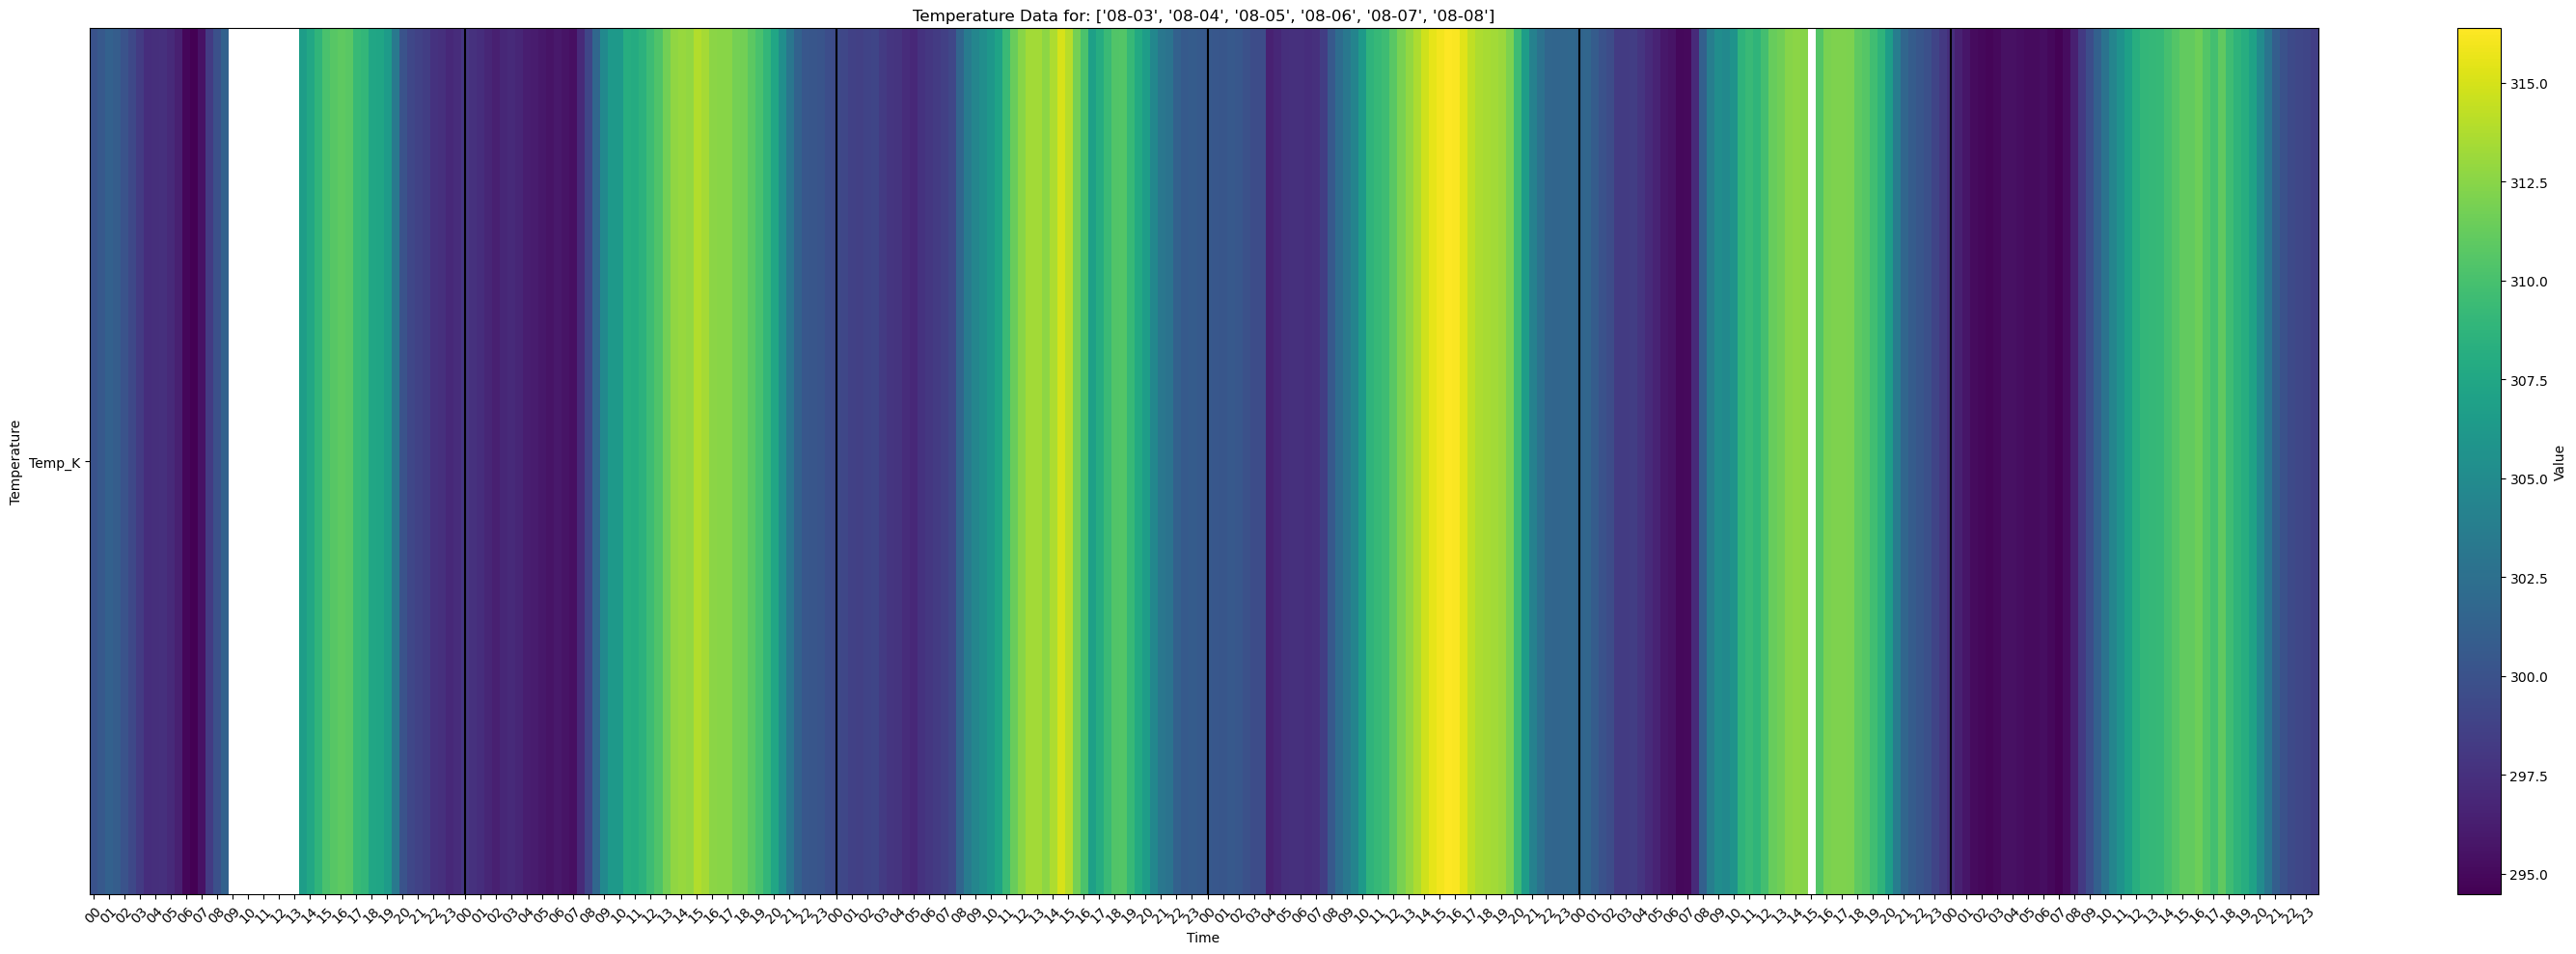

In [ ]:
# Create the heatmap using imshow
fig1 = plt.figure(figsize=(30, 10))
ax0 = fig1.add_subplot(111)
plt.imshow(df_temp_merged_transposed, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_temp_merged_transposed.columns),2), labels=df_temp_merged_transposed.columns.strftime('%H')[0::2], rotation = 45)
plt.yticks(ticks=np.arange(len(df_temp_merged_transposed.index)), labels=df_temp_merged_transposed.index)

for pos in range(48,len(df_temp_merged_transposed.columns),48):
    plt.axvline(pos, color = 'black')
            
# Add color bar
plt.colorbar(label='Value')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Data for: ' + str(subset_days))

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))

Text(0.5, 1.0, "Temperature Data for: ['08-03', '08-04', '08-05', '08-06', '08-07', '08-08']")

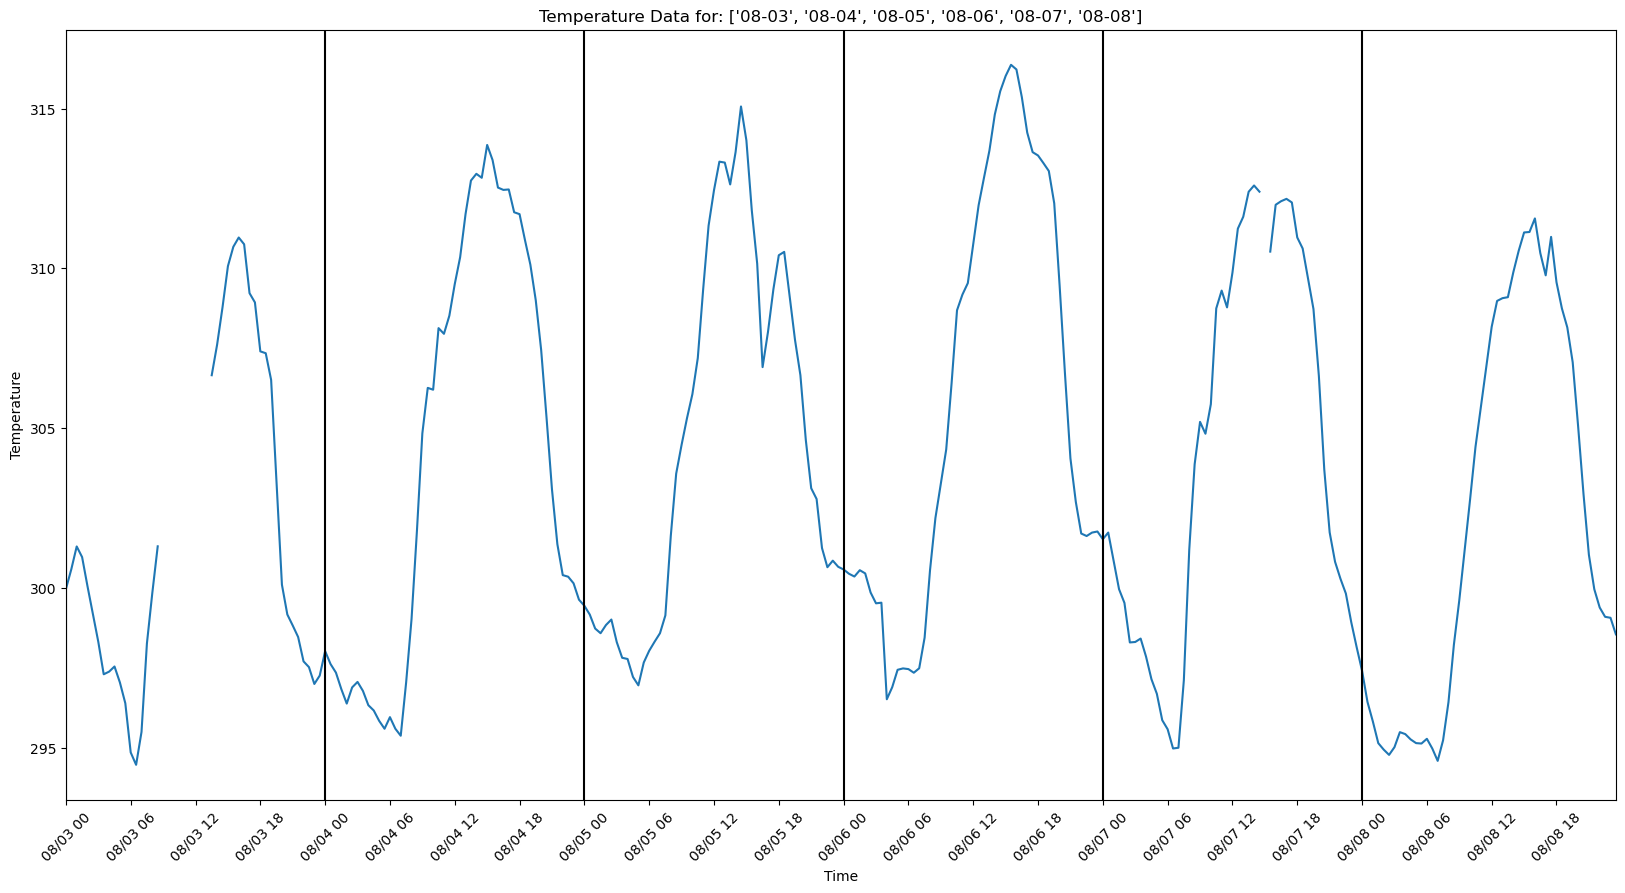

In [ ]:
fig = plt.figure(figsize=(20, 10))

plt.plot(df_temp_merged.index, df_temp_merged.values)
plt.margins(x=0)

#Set x-axis intervals
temp_ticks = []
for temp_tick_idx in range(0,len(df_temp_merged.index),12):
    temp_ticks.append(df_temp_merged.index[temp_tick_idx])
plt.xticks(ticks=temp_ticks, labels=df_temp_merged.index.strftime('%m/%d %H')[0::12], rotation = 45)

#Draw vertical black line at midnight to distinguish the days
midnight_vals = []
for midnight_idx in range(0,len(df_temp_merged.index),48):
    midnight_vals.append(df_temp_merged.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Data for: ' + str(subset_days))

## Ozone values for subset of days

In [41]:
#load file for all dates
all_days_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
all_days_filepath_load = xr.open_dataset(all_days_filepath)
df_alldays = all_days_filepath_load.to_dataframe()
df_alldays.set_index('time_local', inplace=True)

#Take a subset of the days
subset_days = ['08-03','08-04','08-05','08-06','08-07','08-08']
df_subsetdays = df_alldays.sort_index().loc["2024-08-03":"2024-08-08"]

In [42]:
df_ozone_merged = df_subsetdays['O3_ppbv'].to_frame()
df_ozone_merged_transposed = df_ozone_merged.T

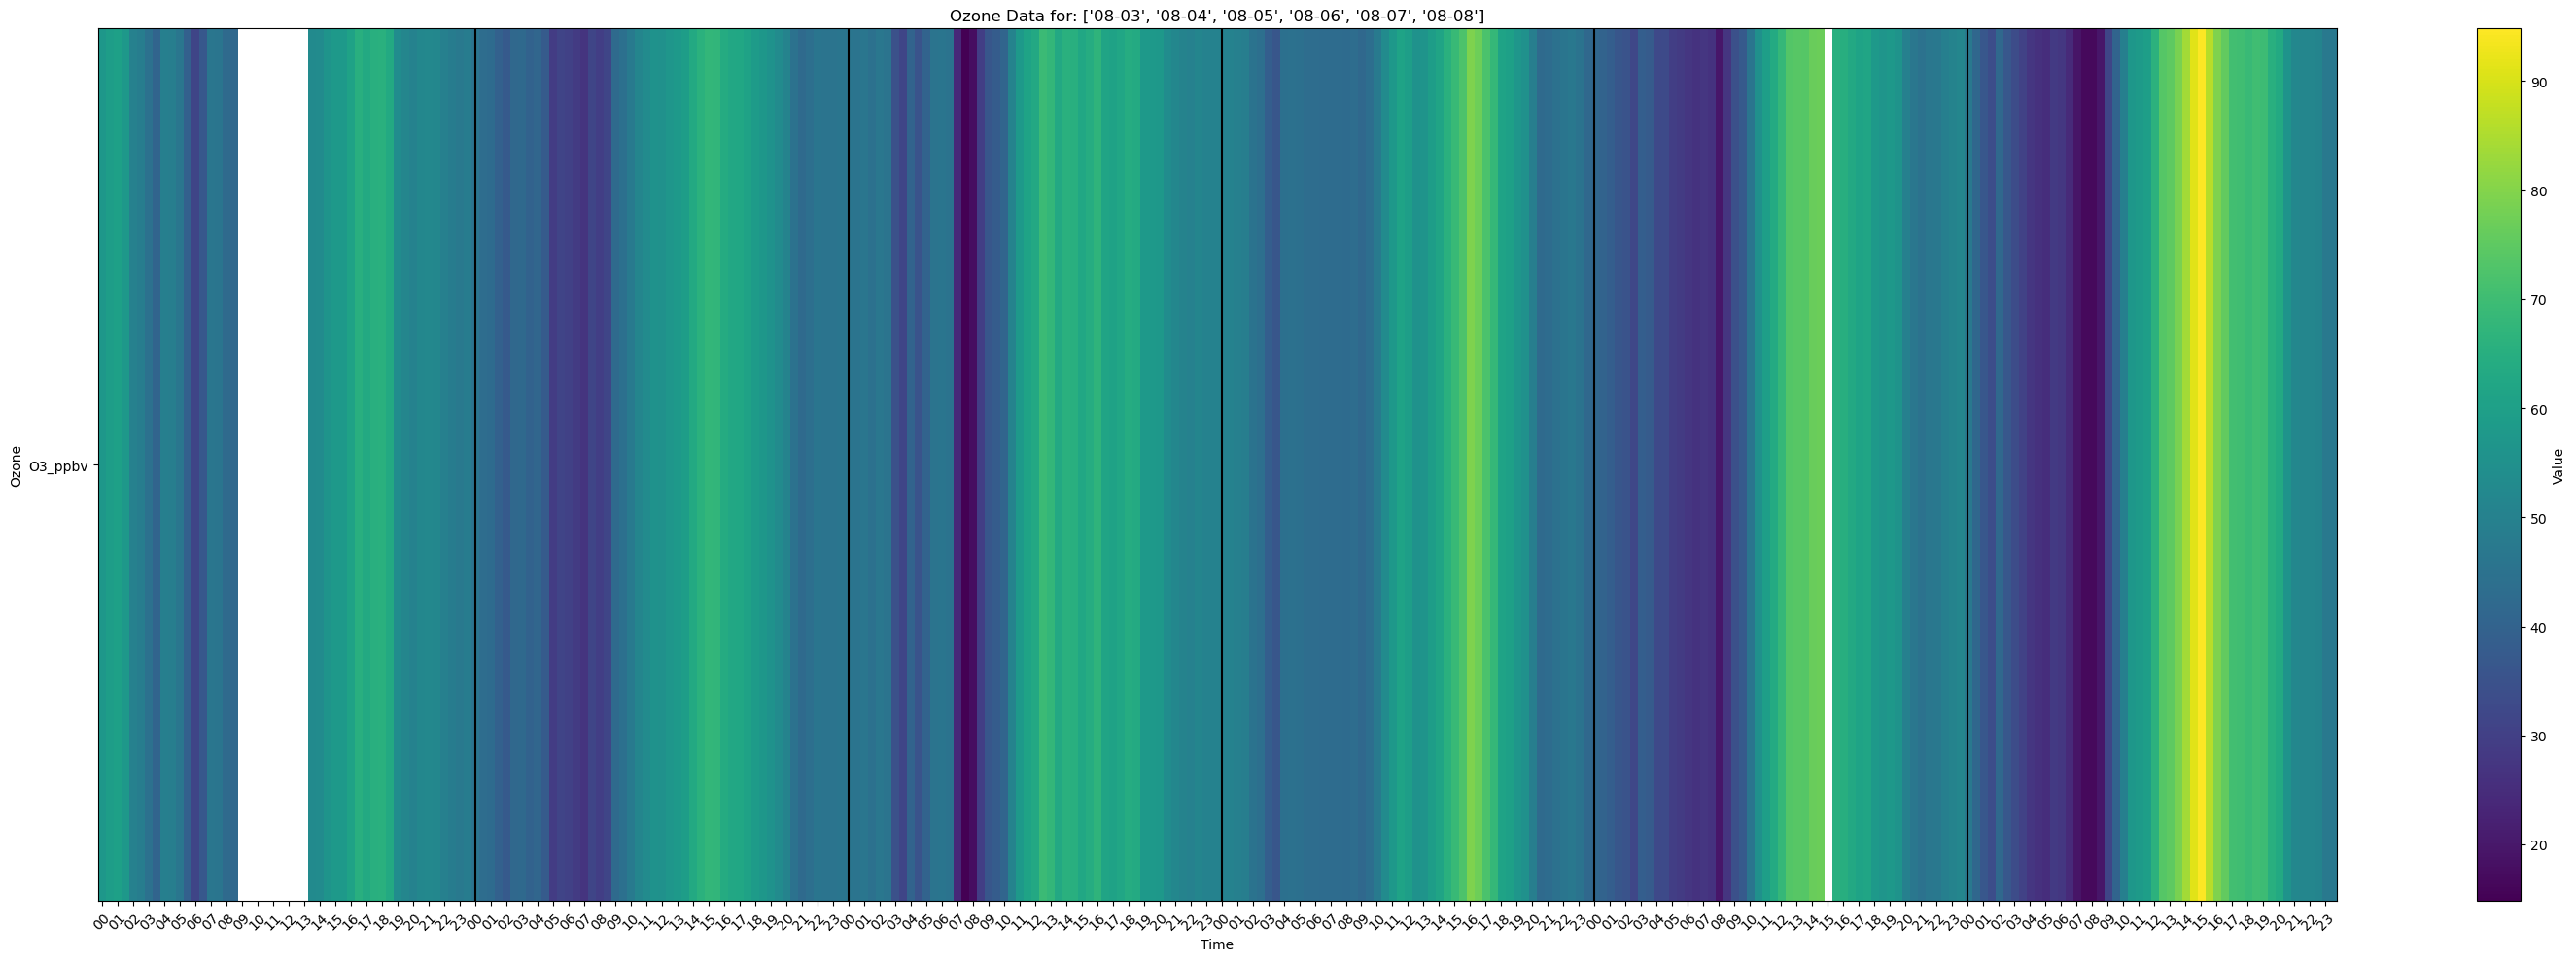

In [43]:
# Create the heatmap using imshow
fig1 = plt.figure(figsize=(30, 10))
ax0 = fig1.add_subplot(111)
plt.imshow(df_ozone_merged_transposed, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_ozone_merged_transposed.columns),2), labels=df_ozone_merged_transposed.columns.strftime('%H')[0::2], rotation = 45)
plt.yticks(ticks=np.arange(len(df_ozone_merged_transposed.index)), labels=df_ozone_merged_transposed.index)

for pos in range(48,len(df_ozone_merged_transposed.columns),48):
    plt.axvline(pos, color = 'black')
            
# Add color bar
plt.colorbar(label='Value')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.title('Ozone Data for: ' + str(subset_days))

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))

Text(0.5, 1.0, "Ozone Data for: ['08-03', '08-04', '08-05', '08-06', '08-07', '08-08']")

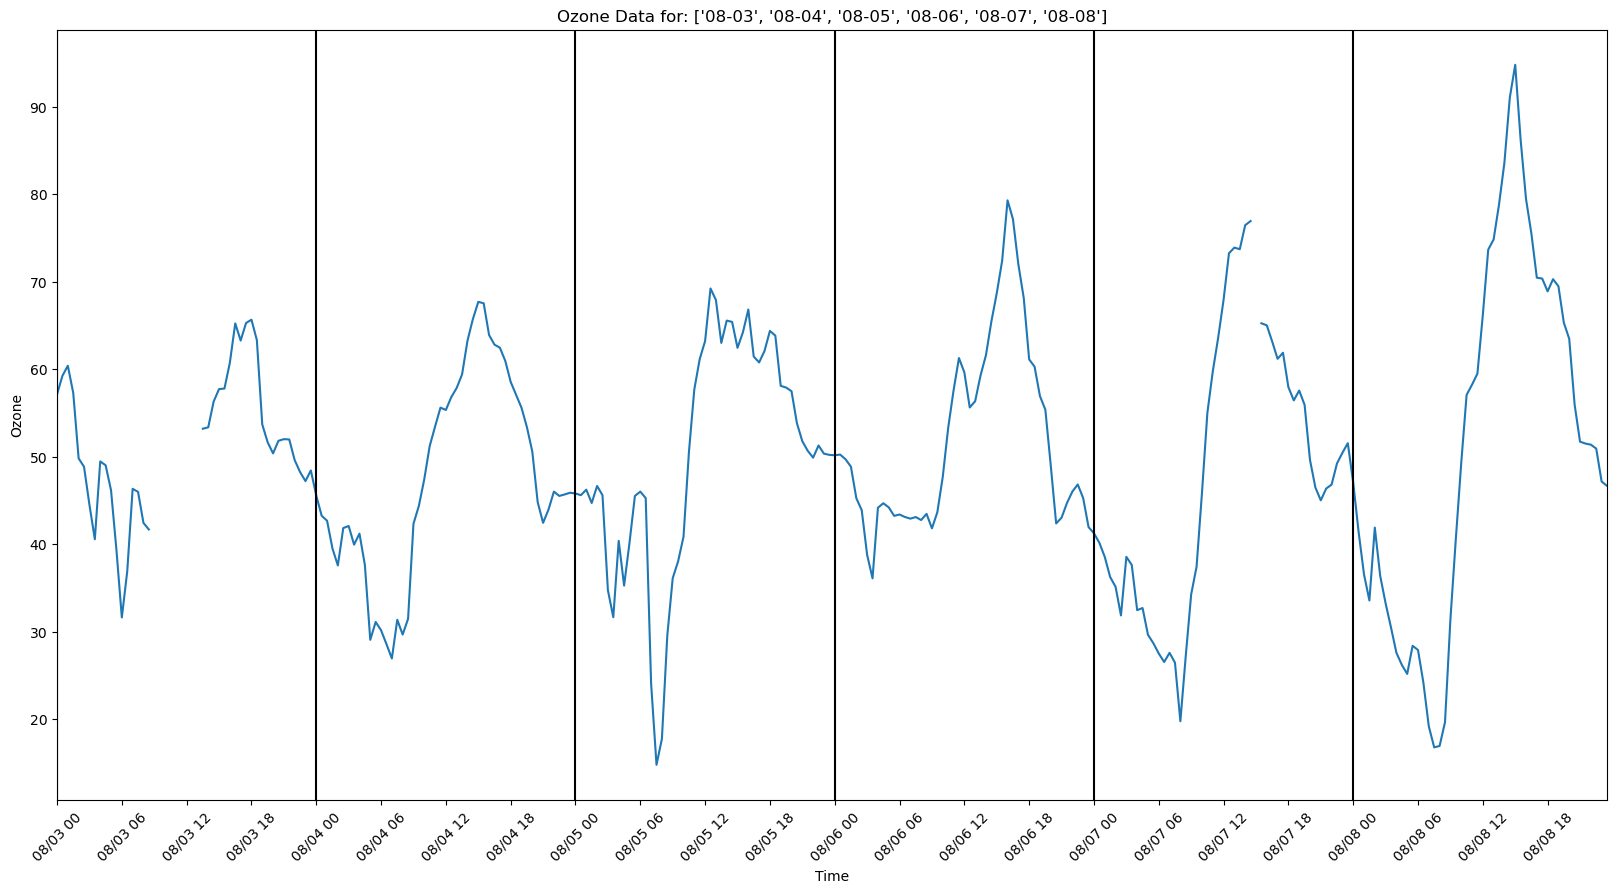

In [10]:
fig = plt.figure(figsize=(20, 10))

plt.plot(df_ozone_merged.index, df_ozone_merged.values)
plt.margins(x=0)

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(0,len(df_ozone_merged.index),12):
    ozone_ticks.append(df_ozone_merged.index[ozone_tick_idx])
plt.xticks(ticks=ozone_ticks, labels=df_ozone_merged.index.strftime('%m/%d %H')[0::12], rotation = 45)

#Draw vertical black line at midnight to distinguish the days
midnight_vals = []
for midnight_idx in range(0,len(df_ozone_merged.index),48):
    midnight_vals.append(df_ozone_merged.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.xlabel('Time')
plt.ylabel('Ozone')
plt.title('Ozone Data for: ' + str(subset_days))

## MDA8 Ozone for subset

In [57]:
alldays_hourly_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_1hr/all_CSL_MobileLab_Parked_rev1hr.nc'
alldays_hourly_filepath_load = xr.open_dataset(alldays_hourly_filepath)
df_alldays_hourly = alldays_hourly_filepath_load.to_dataframe()
df_alldays_hourly.set_index('time_local', inplace=True)

subset_ozone_hourly = ['08-03','08-04','08-05','08-06', '08-07', '08-08']
df_subset_ozone_days_hourly = df_alldays_hourly.sort_index().loc["2024-08-03 12:00:00":"2024-08-08"]
df_ozone_merged_hourly = df_subset_ozone_days_hourly['O3_ppbv'].to_frame()

Text(0.5, 1.0, "Ozone Data for: ['08-03', '08-04', '08-05', '08-06', '08-07', '08-08']")

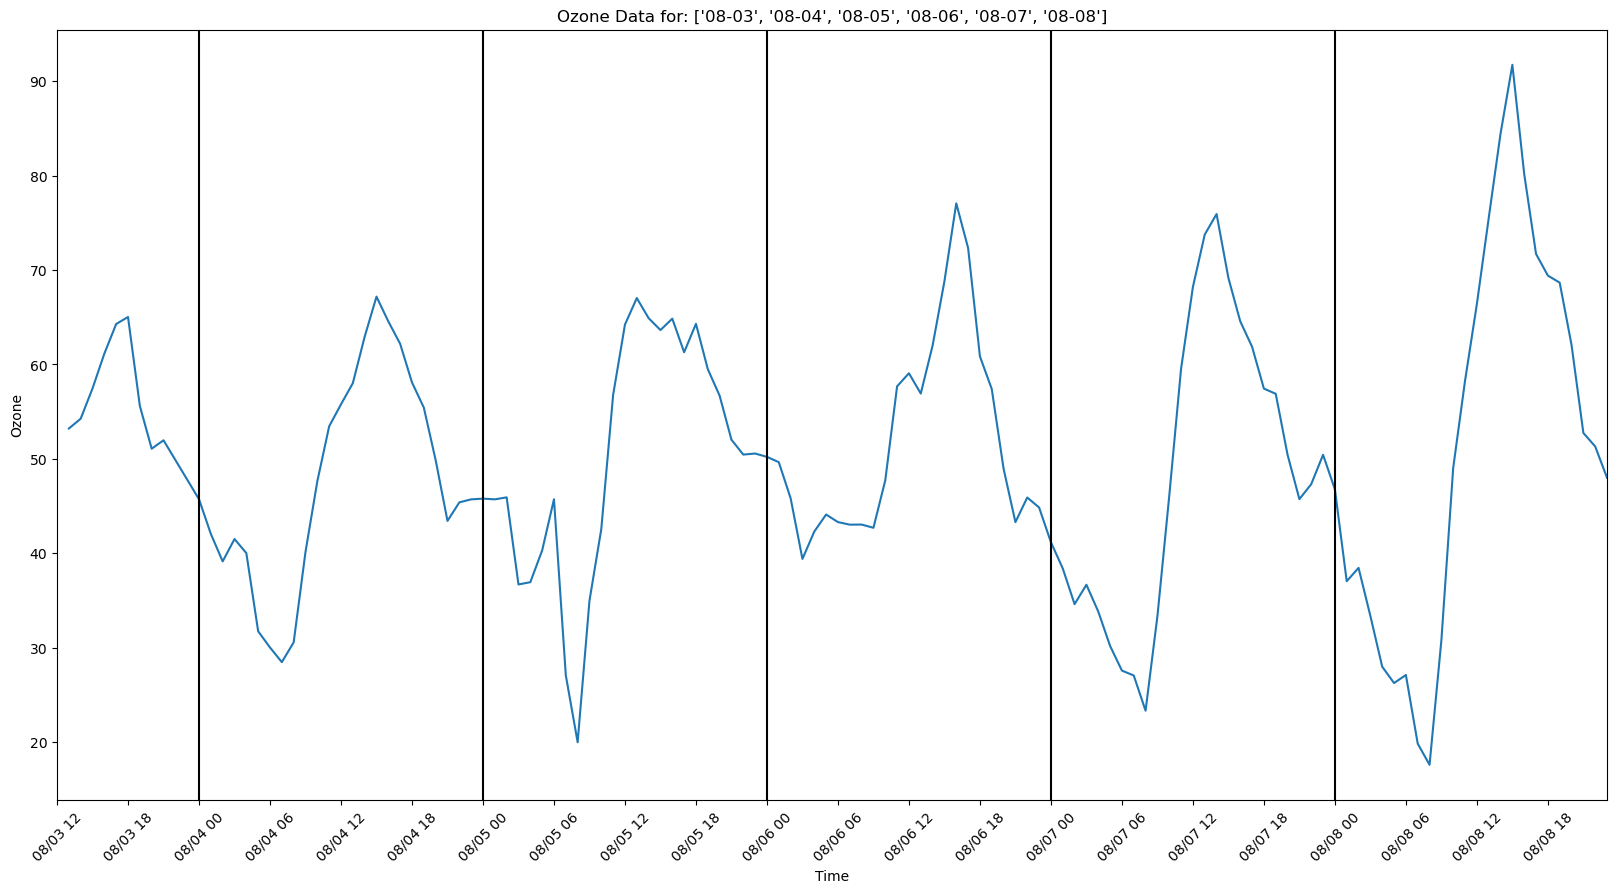

In [58]:
fig = plt.figure(figsize=(20, 10))

plt.plot(df_ozone_merged_hourly.index, df_ozone_merged_hourly.values)
plt.margins(x=0)

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(0,len(df_ozone_merged_hourly.index),6):
    ozone_ticks.append(df_ozone_merged_hourly.index[ozone_tick_idx])
plt.xticks(ticks=ozone_ticks, labels=df_ozone_merged_hourly.index.strftime('%m/%d %H')[0::6], rotation = 45)

#Draw vertical black line at midnight to distinguish the days
midnight_vals = []
for midnight_idx in range(12,len(df_ozone_merged_hourly.index),24):
    midnight_vals.append(df_ozone_merged_hourly.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.xlabel('Time')
plt.ylabel('Ozone')
plt.title('Ozone Data for: ' + str(subset_ozone_hourly))

In [59]:
max_display_options = ['display.max_seq_items', 'display.max_colwidth', 'display.max_dir_items', 'display.max_columns', 'display.max_rows']
for param in range(0,len(max_display_options)):
    pd.set_option(max_display_options[param], None)
# pd.set_option(max_display_options[1], None)
# pd.set_option(max_display_options[2], None)
# pd.set_option(max_display_options[3], None)


In [60]:
# Step 1: Calculate the 8-hour rolling average
df_subset_ozone_days_hourly['O3_8hr_avg'] = df_ozone_merged_hourly['O3_ppbv'].rolling(window=8, min_periods=8).mean()
#rolling average only works for 8 hours with no gaps; at least 6 hours

# Step 2: Calculate the maximum 8-hour average for each day
# Resample to daily frequency, compute the daily max of the rolling averages, drop NA values
daily_max_8hr_avg_ozone = df_subset_ozone_days_hourly['O3_8hr_avg'].resample('D').max().dropna()
#print('Max 8 hr avg each day:\n', daily_max_8hr_avg_ozone)

# Step 3: Map the daily maximum back to the original dataframe
# Create a new temporary column with the daily max 8-hour average for each timestamp
df_ozone_merged_hourly['MDA8_O3'] = df_ozone_merged_hourly.index.floor('D').map(daily_max_8hr_avg_ozone)

#print('Daily max 8 hour avg for each timestamp: \n', df_ozone_merged['MDA8_O3'])
# Select daytime values only where MD8A > 65
df_ozone_day_exceedance = df_ozone_merged_hourly[(df_ozone_merged_hourly.index.hour >=7) & (df_ozone_merged_hourly.index.hour<=20) & (df_ozone_merged_hourly['MDA8_O3']>65)]
print('When is MDA8 > 65?\n', df_ozone_day_exceedance)

When is MDA8 > 65?
                        O3_ppbv    MDA8_O3
time_local                               
2024-08-07 07:00:00  27.060583  66.312976
2024-08-07 08:00:00  23.330694  66.312976
2024-08-07 09:00:00  33.326500  66.312976
2024-08-07 10:00:00  46.068028  66.312976
2024-08-07 11:00:00  59.546500  66.312976
2024-08-07 12:00:00  68.204444  66.312976
2024-08-07 13:00:00  73.757194  66.312976
2024-08-07 14:00:00  75.932803  66.312976
2024-08-07 15:00:00  69.165404  66.312976
2024-08-07 16:00:00  64.573750  66.312976
2024-08-07 17:00:00  61.877028  66.312976
2024-08-07 18:00:00  57.446686  66.312976
2024-08-07 19:00:00  56.893778  66.312976
2024-08-07 20:00:00  50.437778  66.312976
2024-08-08 07:00:00  19.847472  76.006722
2024-08-08 08:00:00  17.599778  76.006722
2024-08-08 09:00:00  30.779389  76.006722
2024-08-08 10:00:00  49.051694  76.006722
2024-08-08 11:00:00  58.275944  76.006722
2024-08-08 12:00:00  66.399556  76.006722
2024-08-08 13:00:00  75.497587  76.006722
2024-08-08 14:

---

## MDA8 Ozone All Days

In [25]:
alldays_30min_filepath = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/all_CSL_MobileLab_Parked_rev30minv4.nc'
alldays_30min_filepath_load = xr.open_dataset(alldays_30min_filepath)
df_alldays_30min = alldays_30min_filepath_load.to_dataframe()

In [26]:
#Where are the NaNs? This will help us choose which days to cut off in the beginning
for o3_val in range(0,len(df_alldays_30min['O3_ppbv'])):
    nan_check = np.isnan(df_alldays_30min['O3_ppbv'].values[o3_val])
    if nan_check == True:
        print(df_alldays_30min.index[o3_val])

2024-07-15 00:00:00
2024-07-15 00:30:00
2024-07-15 01:00:00
2024-07-15 01:30:00
2024-07-15 02:00:00
2024-07-15 02:30:00
2024-07-15 03:00:00
2024-07-15 03:30:00
2024-07-15 04:00:00
2024-07-15 04:30:00
2024-07-15 05:00:00
2024-07-15 05:30:00
2024-07-15 06:00:00
2024-07-15 06:30:00
2024-07-15 07:00:00
2024-07-15 07:30:00
2024-07-15 08:00:00
2024-07-15 08:30:00
2024-07-15 09:00:00
2024-07-15 09:30:00
2024-07-15 10:00:00
2024-07-15 10:30:00
2024-07-15 11:00:00
2024-07-15 11:30:00
2024-07-15 12:00:00
2024-07-15 12:30:00
2024-07-15 13:00:00
2024-07-15 13:30:00
2024-07-15 14:00:00
2024-07-15 14:30:00
2024-07-15 15:00:00
2024-07-15 15:30:00
2024-07-15 16:00:00
2024-07-15 16:30:00
2024-07-15 17:00:00
2024-07-15 17:30:00
2024-07-15 18:00:00
2024-07-15 18:30:00
2024-07-15 19:00:00
2024-07-15 19:30:00
2024-07-15 20:00:00
2024-07-15 20:30:00
2024-07-15 21:00:00
2024-07-15 21:30:00
2024-07-15 22:00:00
2024-07-15 22:30:00
2024-07-15 23:00:00
2024-07-15 23:30:00
2024-07-16 00:00:00
2024-07-16 00:30:00


In [27]:
#From the last cell, we see that we only have data starting on 2024-07-16 16:00:00. Before that is all Nans. So we cut off the beginning:
df_adjuststart_30min = df_alldays_30min.sort_index().loc["2024-07-16 16:00:00":"2024-08-18 17:00:00"]
df_adjuststart_30min_ozone = df_adjuststart_30min['O3_ppbv'].to_frame()

df_july_30min = df_adjuststart_30min_ozone.sort_index().loc["2024-07-16 16:00:00":"2024-07-31 23:00:00"]
df_july_adjuststart_30min_ozone = df_july_30min['O3_ppbv'].to_frame()

df_august_30min = df_adjuststart_30min_ozone.sort_index().loc["2024-08-01":"2024-08-18 18:00:00"]
df_august_adjuststart_30min_ozone = df_august_30min['O3_ppbv'].to_frame()

Now we will interpolate any negative and Nan data

In [28]:
#Count how many total Nans and negative points there are
n_baddies_total_30min= len([item for item in df_adjuststart_30min_ozone['O3_ppbv'] if item <0 or np.isnan(item)])
n_baddies_july_30min= len([item for item in df_july_adjuststart_30min_ozone['O3_ppbv'] if item <0 or np.isnan(item)])
n_baddies_august_30min= len([item for item in df_august_adjuststart_30min_ozone['O3_ppbv'] if item <0 or np.isnan(item)])

#make a new column for interpolation, also setting any negatives to NaNs
df_adjuststart_30min_ozone['O3_ppbv_interp'] = df_adjuststart_30min_ozone['O3_ppbv'].mask(df_adjuststart_30min_ozone['O3_ppbv'] < 0, np.nan)
df_july_adjuststart_30min_ozone['O3_ppbv_interp'] = df_july_adjuststart_30min_ozone['O3_ppbv'].mask(df_july_adjuststart_30min_ozone['O3_ppbv'] < 0, np.nan)
df_august_adjuststart_30min_ozone['O3_ppbv_interp'] = df_august_adjuststart_30min_ozone['O3_ppbv'].mask(df_august_adjuststart_30min_ozone['O3_ppbv'] < 0, np.nan)

#Where we have a NaN, print the index so that we can identify what times we are interpolating for
for o3_val in range(0,len(df_adjuststart_30min_ozone['O3_ppbv_interp'])):
    nan_check = np.isnan(df_adjuststart_30min_ozone['O3_ppbv_interp'].values[o3_val])
    if nan_check == True:
        print(df_adjuststart_30min_ozone.index[o3_val])

2024-07-18 19:30:00
2024-07-18 20:00:00
2024-07-18 20:30:00
2024-07-18 21:00:00
2024-07-18 21:30:00
2024-07-18 22:00:00
2024-07-18 22:30:00
2024-07-18 23:00:00
2024-07-18 23:30:00
2024-07-22 18:00:00
2024-07-22 18:30:00
2024-07-22 19:00:00
2024-07-22 19:30:00
2024-07-22 20:00:00
2024-07-22 20:30:00
2024-07-22 21:00:00
2024-07-22 21:30:00
2024-07-22 22:00:00
2024-07-22 22:30:00
2024-07-22 23:00:00
2024-07-22 23:30:00
2024-07-23 00:00:00
2024-07-23 18:00:00
2024-07-23 18:30:00
2024-07-23 19:00:00
2024-07-23 19:30:00
2024-07-23 20:00:00
2024-07-23 20:30:00
2024-07-23 21:00:00
2024-07-23 21:30:00
2024-07-23 22:00:00
2024-07-26 16:00:00
2024-07-26 16:30:00
2024-07-26 17:00:00
2024-07-26 17:30:00
2024-07-26 18:00:00
2024-07-26 18:30:00
2024-07-26 19:00:00
2024-07-26 19:30:00
2024-07-26 20:00:00
2024-07-26 20:30:00
2024-07-26 21:00:00
2024-07-28 16:00:00
2024-07-28 16:30:00
2024-07-28 17:00:00
2024-07-28 17:30:00
2024-07-28 18:00:00
2024-07-28 18:30:00
2024-07-28 19:00:00
2024-07-28 19:30:00


In [29]:
#We interpolate all the NaNs
df_adjuststart_30min_ozone['O3_ppbv_interp']  = df_adjuststart_30min_ozone['O3_ppbv_interp'].interpolate(method='linear')
df_july_adjuststart_30min_ozone['O3_ppbv_interp']  = df_july_adjuststart_30min_ozone['O3_ppbv_interp'].interpolate(method='linear')
df_august_adjuststart_30min_ozone['O3_ppbv_interp']  = df_august_adjuststart_30min_ozone['O3_ppbv_interp'].interpolate(method='linear')

Text(0.5, 1.0, 'Interpolation for Ozone in July')

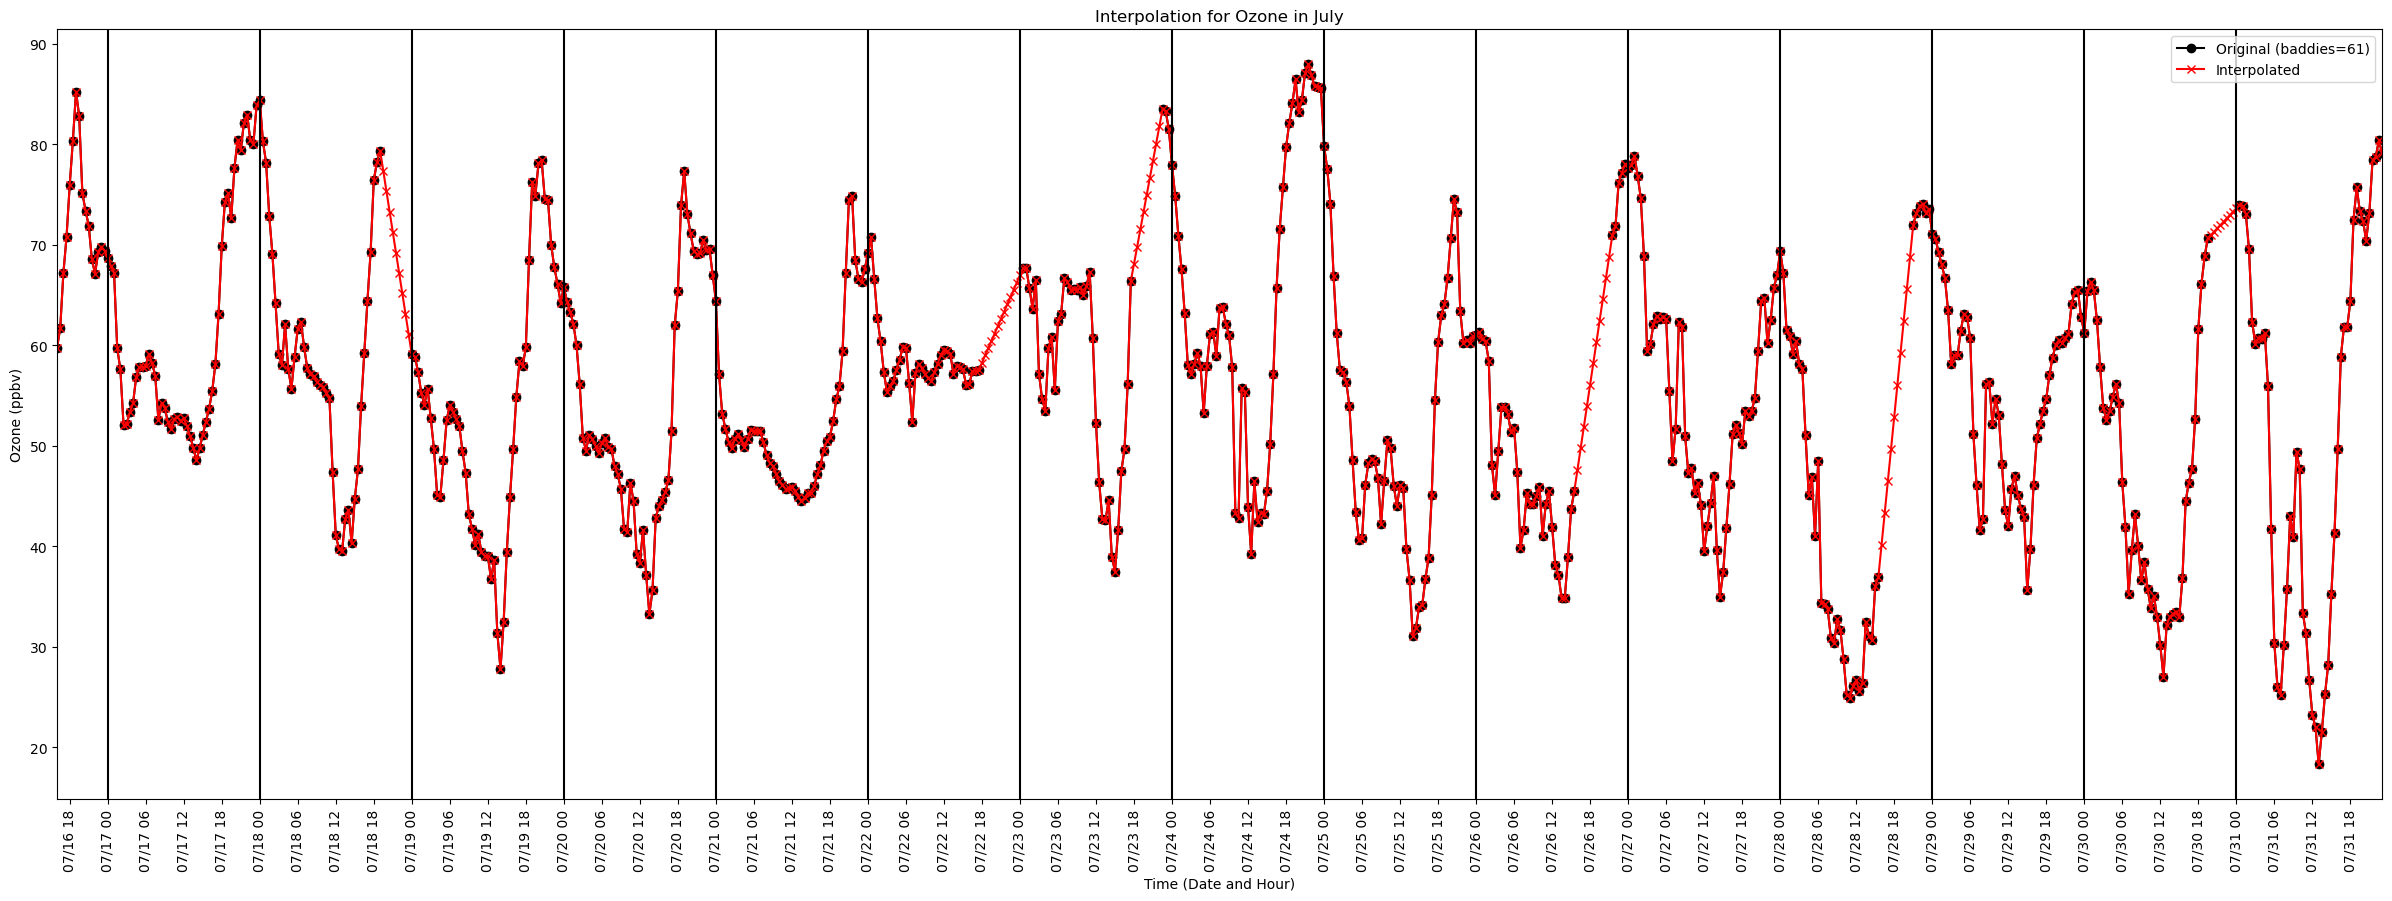

In [30]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_july_adjuststart_30min_ozone.index, df_july_adjuststart_30min_ozone['O3_ppbv'], color='k', marker='o',label=f'Original (baddies={n_baddies_july_30min})')
plt.plot(df_july_adjuststart_30min_ozone.index, df_july_adjuststart_30min_ozone['O3_ppbv_interp'], color='r', marker='x', label='Interpolated')

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(4,len(df_july_adjuststart_30min_ozone.index),12):
    ozone_ticks.append(df_july_adjuststart_30min_ozone.index[ozone_tick_idx])
    
plt.xticks(ticks=ozone_ticks, labels=df_july_adjuststart_30min_ozone.index.strftime('%m/%d %H')[4::12], rotation = 90)

# #Draw vertical black line at midnight to distinguish the days
midnight_vals = []
for midnight_idx in range(16,len(df_july_adjuststart_30min_ozone.index),48):
    midnight_vals.append(df_july_adjuststart_30min_ozone.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.margins(x=0)
plt.xlabel('Time (Date and Hour)')
plt.ylabel('Ozone (ppbv)')

plt.legend()
plt.title('Interpolation for Ozone in July')

Text(0.5, 1.0, 'Interpolation for Ozone in August')

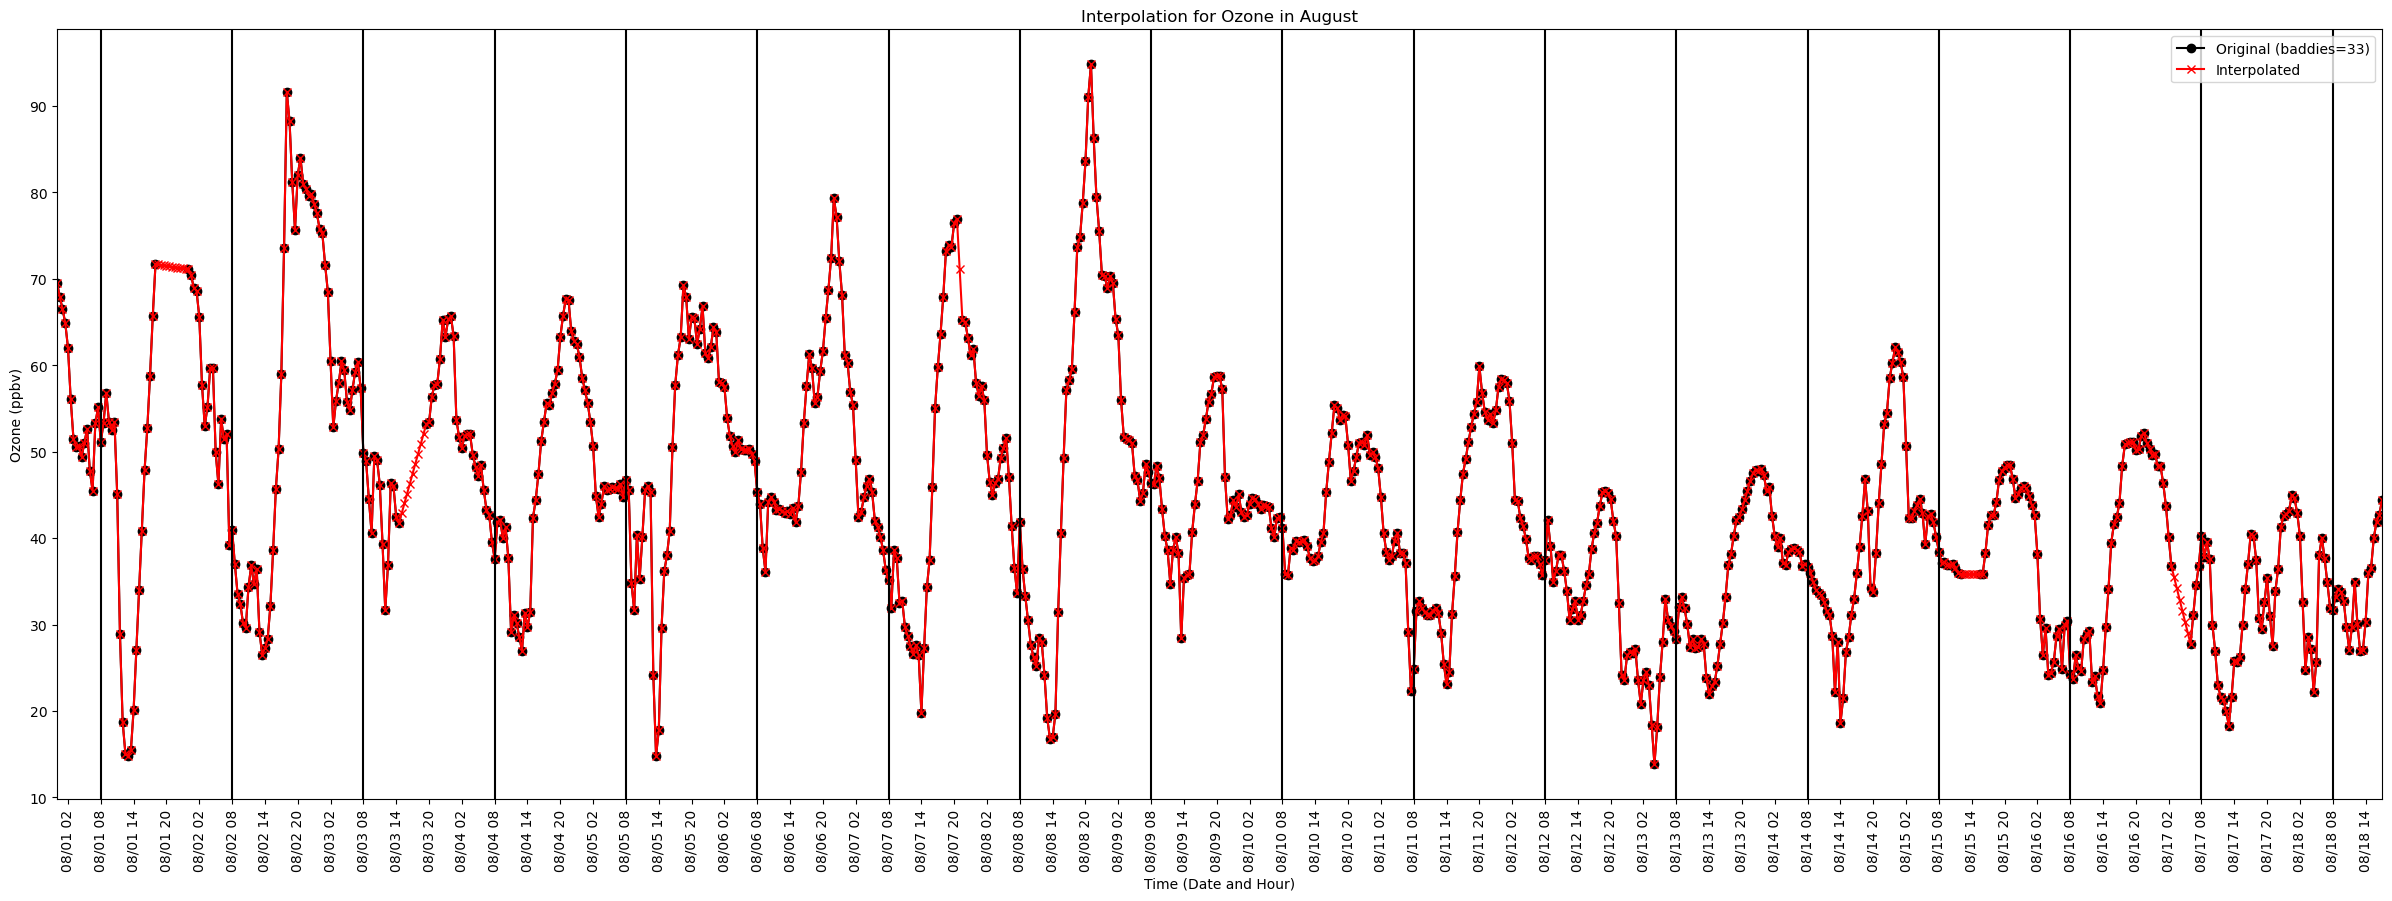

In [31]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_august_adjuststart_30min_ozone.index, df_august_adjuststart_30min_ozone['O3_ppbv'], color='k', marker='o',label=f'Original (baddies={n_baddies_august_30min})')
plt.plot(df_august_adjuststart_30min_ozone.index, df_august_adjuststart_30min_ozone['O3_ppbv_interp'], color='r', marker='x', label='Interpolated')

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(4,len(df_august_adjuststart_30min_ozone.index),12):
    ozone_ticks.append(df_august_adjuststart_30min_ozone.index[ozone_tick_idx])
    
plt.xticks(ticks=ozone_ticks, labels=df_august_adjuststart_30min_ozone.index.strftime('%m/%d %H')[4::12], rotation = 90)

# #Draw vertical black line at midnight to distinguish the days
midnight_vals = []
for midnight_idx in range(16,len(df_august_adjuststart_30min_ozone.index),48):
    midnight_vals.append(df_august_adjuststart_30min_ozone.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.margins(x=0)
plt.xlabel('Time (Date and Hour)')
plt.ylabel('Ozone (ppbv)')

plt.legend()
plt.title('Interpolation for Ozone in August')

In [54]:
# Step 1: Calculate the 8-hour rolling average
df_adjuststart_30min_ozone['O3_8hr_avg'] = df_adjuststart_30min_ozone['O3_ppbv_interp'].rolling(window=16, min_periods=16).mean()
#rolling average only works for 8 hours with no gaps; at least 6 hours
#print(df_adjuststart_hourly_ozone)

# Step 2: Calculate the maximum 8-hour average for each day
# Resample to daily frequency, compute the daily max of the rolling averages, drop NA values
adjuststart_daily_max_8hr_avg_ozone_30min = df_adjuststart_30min_ozone['O3_8hr_avg'].resample('D').max().dropna()
#print('Max 8 hr avg each day:\n', adjuststart_daily_max_8hr_avg_ozone)

# Step 3: Map the daily maximum back to the original dataframe
# Create a new temporary column with the daily max 8-hour average for each timestamp
df_adjuststart_30min_ozone['MDA8_O3'] = df_adjuststart_30min_ozone.index.floor('D').map(adjuststart_daily_max_8hr_avg_ozone_30min)
#print('Daily max 8 hour avg for each timestamp: \n', df_adjuststart_hourly_ozone['MDA8_O3'])

# Select daytime values only where MD8A > 65
df_ozone_day_exceedance_30min = df_adjuststart_30min_ozone[(df_adjuststart_30min_ozone.index.hour >=7) & (df_adjuststart_30min_ozone.index.hour<=20) & (df_adjuststart_30min_ozone['MDA8_O3']>65)]
#print('When is MDA8 > 65?\n', df_ozone_day_exceedance_30min)



When is MDA8 > 65?
                        O3_ppbv  O3_ppbv_interp  O3_8hr_avg    MDA8_O3
time_UTC                                                             
2024-07-16 16:00:00  59.771677       59.771677         NaN  71.787833
2024-07-16 16:30:00  61.692203       61.692203         NaN  71.787833
2024-07-16 17:00:00  67.168889       67.168889         NaN  71.787833
2024-07-16 17:30:00  70.801556       70.801556         NaN  71.787833
2024-07-16 18:00:00  75.945000       75.945000         NaN  71.787833
2024-07-16 18:30:00  80.373889       80.373889         NaN  71.787833
2024-07-16 19:00:00  85.265556       85.265556         NaN  71.787833
2024-07-16 19:30:00  82.805556       82.805556         NaN  71.787833
2024-07-16 20:00:00  75.154000       75.154000         NaN  71.787833
2024-07-16 20:30:00  73.429333       73.429333         NaN  71.787833
2024-07-17 07:00:00  58.264556       58.264556   59.413910  73.100877
2024-07-17 07:30:00  56.999222       56.999222   58.635896  73.100877


Text(0.5, 1.0, 'MDA8 Ozone during USOS')

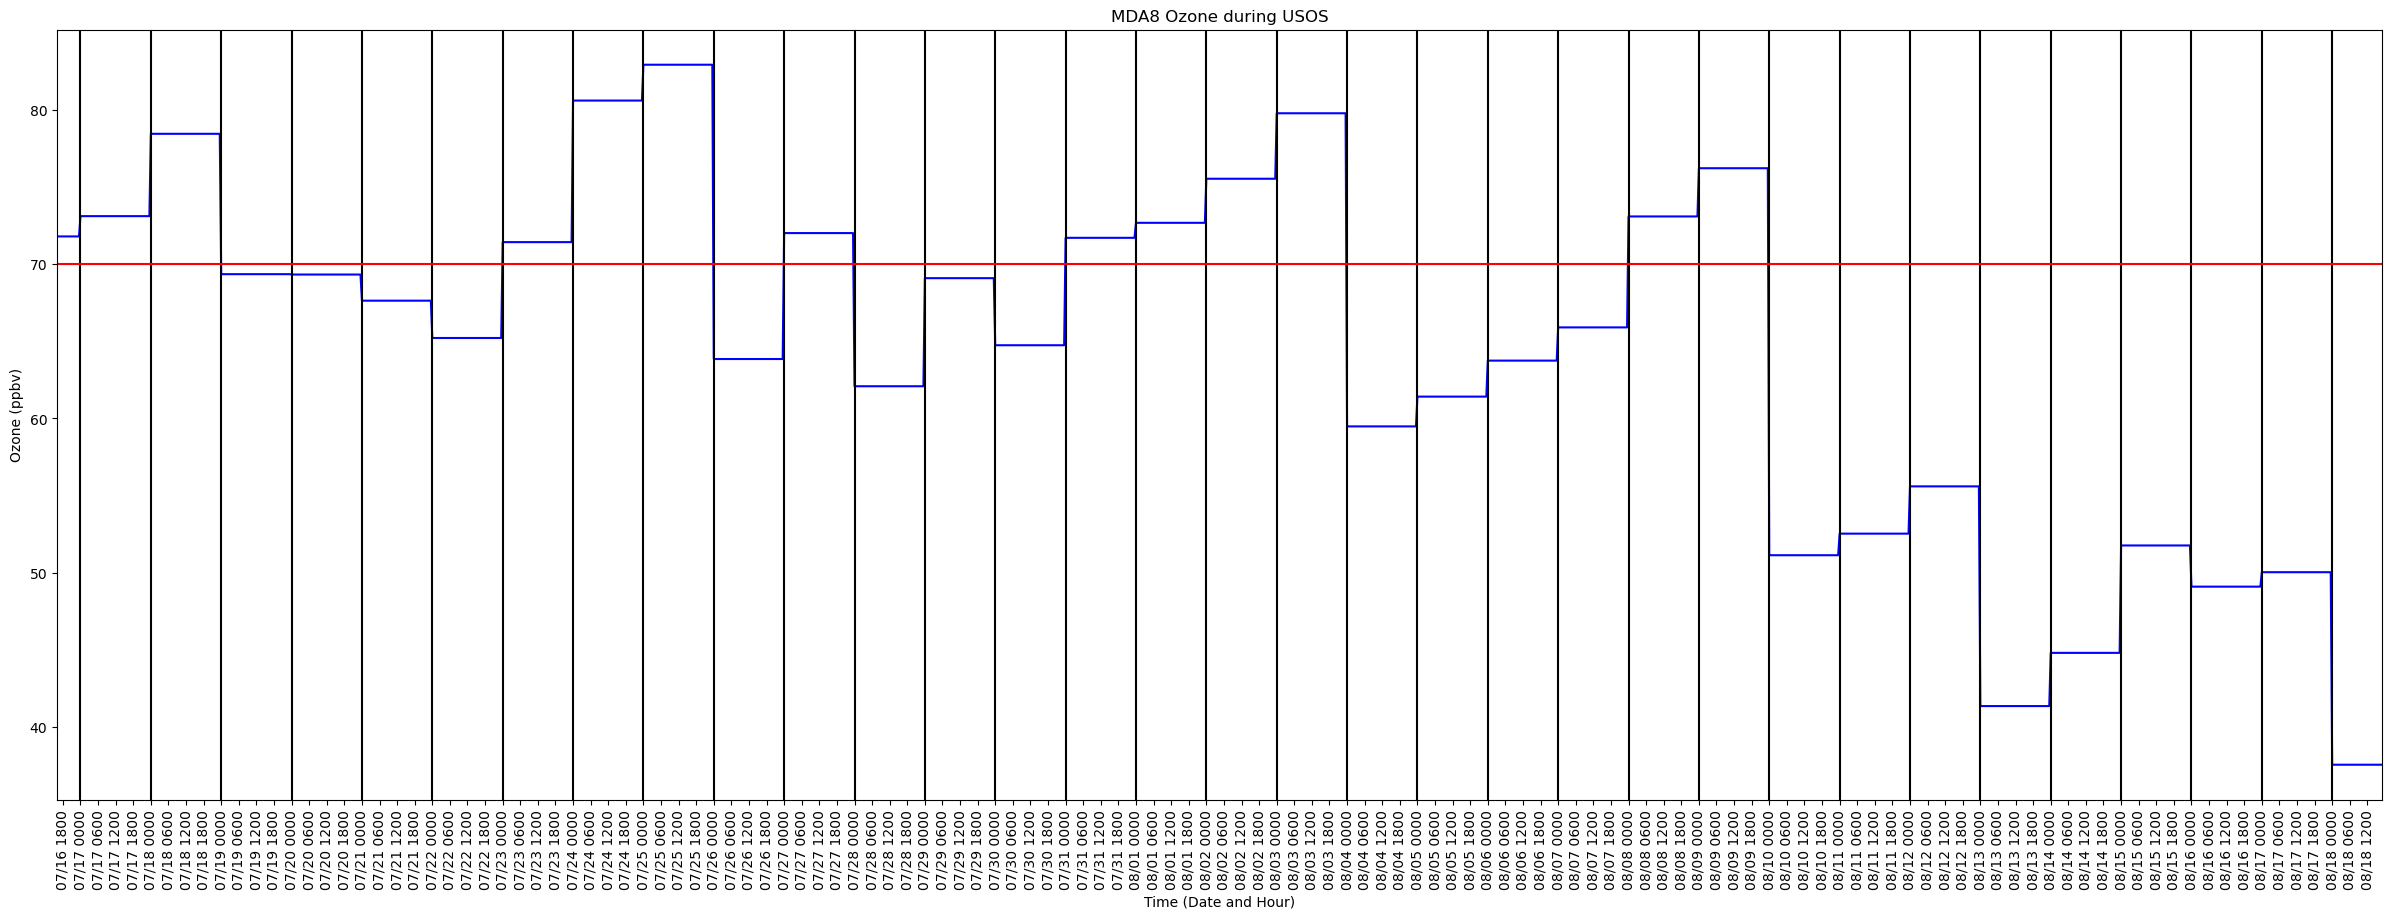

In [35]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df_adjuststart_30min_ozone.index, df_adjuststart_30min_ozone['MDA8_O3'], color='b')
plt.margins(x=0)

#Set x-axis intervals
ozone_ticks = []
for ozone_tick_idx in range(4,len(df_adjuststart_30min_ozone.index),12):
    ozone_ticks.append(df_adjuststart_30min_ozone.index[ozone_tick_idx])
plt.xticks(ticks=ozone_ticks, labels=df_adjuststart_30min_ozone.index.strftime('%m/%d %H%M')[4::12], rotation = 90)

midnight_vals = []
for midnight_idx in range(16,len(df_adjuststart_30min_ozone.index),48):
    midnight_vals.append(df_adjuststart_30min_ozone.index[midnight_idx])
for day_pos in midnight_vals:
    plt.axvline(day_pos, color = 'black')

plt.hlines(y=70, xmin = df_adjuststart_30min_ozone['MDA8_O3'].index[0], xmax = df_adjuststart_30min_ozone['MDA8_O3'].index[len(df_adjuststart_30min_ozone['MDA8_O3'])-1], color = 'r')
plt.xlabel('Time (Date and Hour)')
plt.ylabel('Ozone (ppbv)')

plt.title('MDA8 Ozone during USOS')

We can see that the days that are passing the MDA8 ozone of 70 ppbv are:


In [82]:
df_daily_max_8hr_avg_ozone= adjuststart_daily_max_8hr_avg_ozone_30min.to_frame(name='O3_daily_max_8hr_avg')
print(df_daily_max_8hr_avg_ozone)

            O3_daily_max_8hr_avg
time_UTC                        
2024-07-16             71.787833
2024-07-17             73.100877
2024-07-18             78.432249
2024-07-19             69.343577
2024-07-20             69.320208
2024-07-21             67.627881
2024-07-22             65.211974
2024-07-23             71.418184
2024-07-24             80.584993
2024-07-25             82.905395
2024-07-26             63.849992
2024-07-27             72.004354
2024-07-28             62.086985
2024-07-29             69.085426
2024-07-30             64.742484
2024-07-31             71.697723
2024-08-01             72.669419
2024-08-02             75.522694
2024-08-03             79.762086
2024-08-04             59.487169
2024-08-05             61.416181
2024-08-06             63.746600
2024-08-07             65.897750
2024-08-08             73.081321
2024-08-09             76.203750
2024-08-10             51.146397
2024-08-11             52.543724
2024-08-12             55.603765
2024-08-13

Text(0.5, 1.0, 'MDA8 Ozone for 2 different resolutions during USOS')

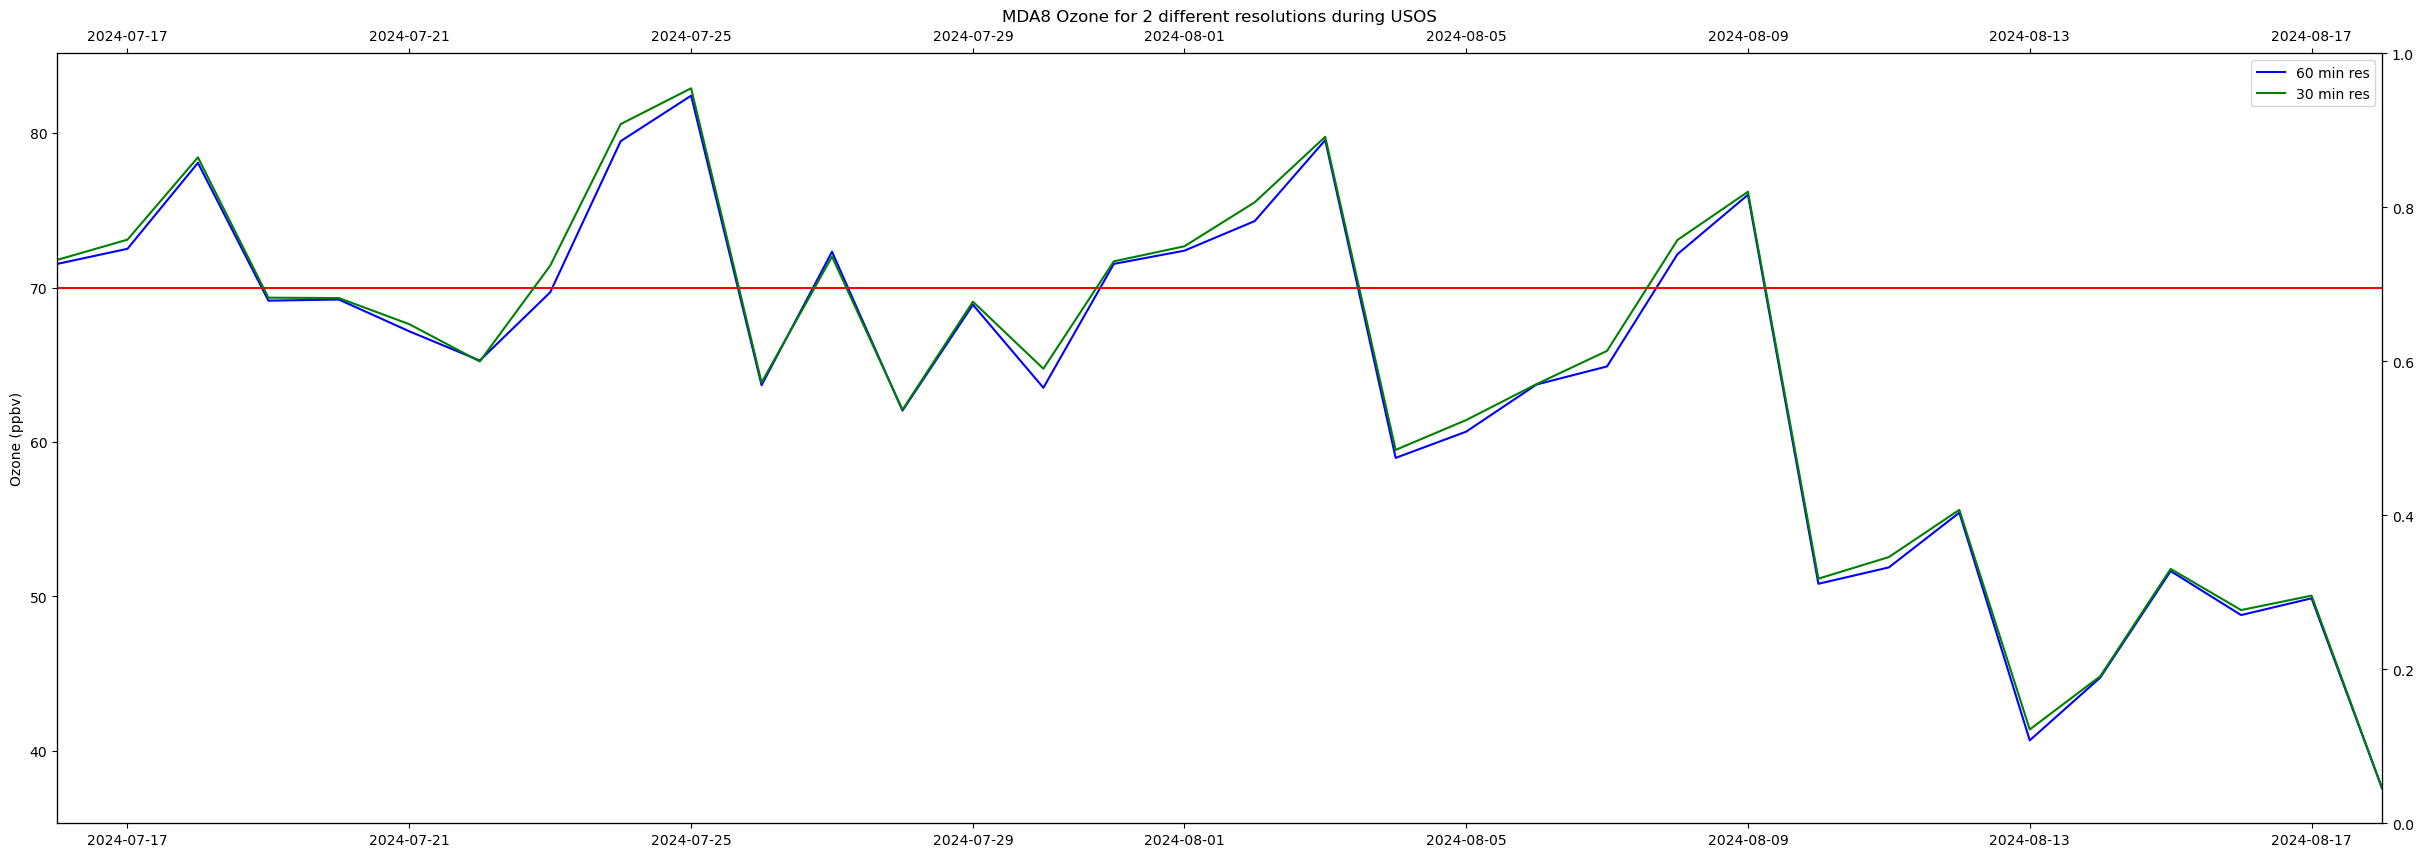

In [ ]:
fig, ax1 = plt.subplots(figsize = (30,10))

ax1.margins(x=0)

ax1.plot(df_daily_max_8hr_avg_ozone.index, df_daily_max_8hr_avg_ozone_both_res['O3_daily_max_8hr_avg'], color='b')

ax1.set_ylabel('Ozone (ppbv)')

ax1.hlines(y=70, xmin = df_daily_max_8hr_avg_ozone_both_res['1hr_res'].index[0], xmax = df_daily_max_8hr_avg_ozone_both_res['1hr_res'].index[len(df_daily_max_8hr_avg_ozone_both_res['1hr_res'])-1], color = 'r')


ax2.margins(x=0)
ax2.plot(df_daily_max_8hr_avg_ozone_both_res.index, df_daily_max_8hr_avg_ozone_both_res['30min_res'], color='g', label = '30 min res')
ax2.set_axis_off()
# ozone_ticks_30min = []
# for ozone_tick_30min_idx in range(4,len(df_adjuststart_30min_ozone.index),12):
#     ozone_ticks_30min.append(df_adjuststart_30min_ozone.index[ozone_tick_30min_idx])
#ax2.set_xticks(ozone_ticks_30min)
#ax2.set_xticklabels(df_adjuststart_30min_ozone.index.strftime('%m/%d %H')[4::12], rotation = 90)
#ax2.set_ylabel('Ozone (ppbv)')


# midnight_vals_30min = []
# for midnight_idx_30min in range(16,len(df_adjuststart_30min_ozone.index),48):
#     midnight_vals_30min.append(df_adjuststart_30min_ozone.index[midnight_idx_30min])
# for day_pos_30min in midnight_vals_30min:
#     ax2.axvline(day_pos_30min, color = 'black')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.title('MDA8 Ozone for 2 different resolutions during USOS')

---

### Dual Axis Plotter

Text(0.5, 1.0, 'MDA8 Ozone and Temperature during USOS')

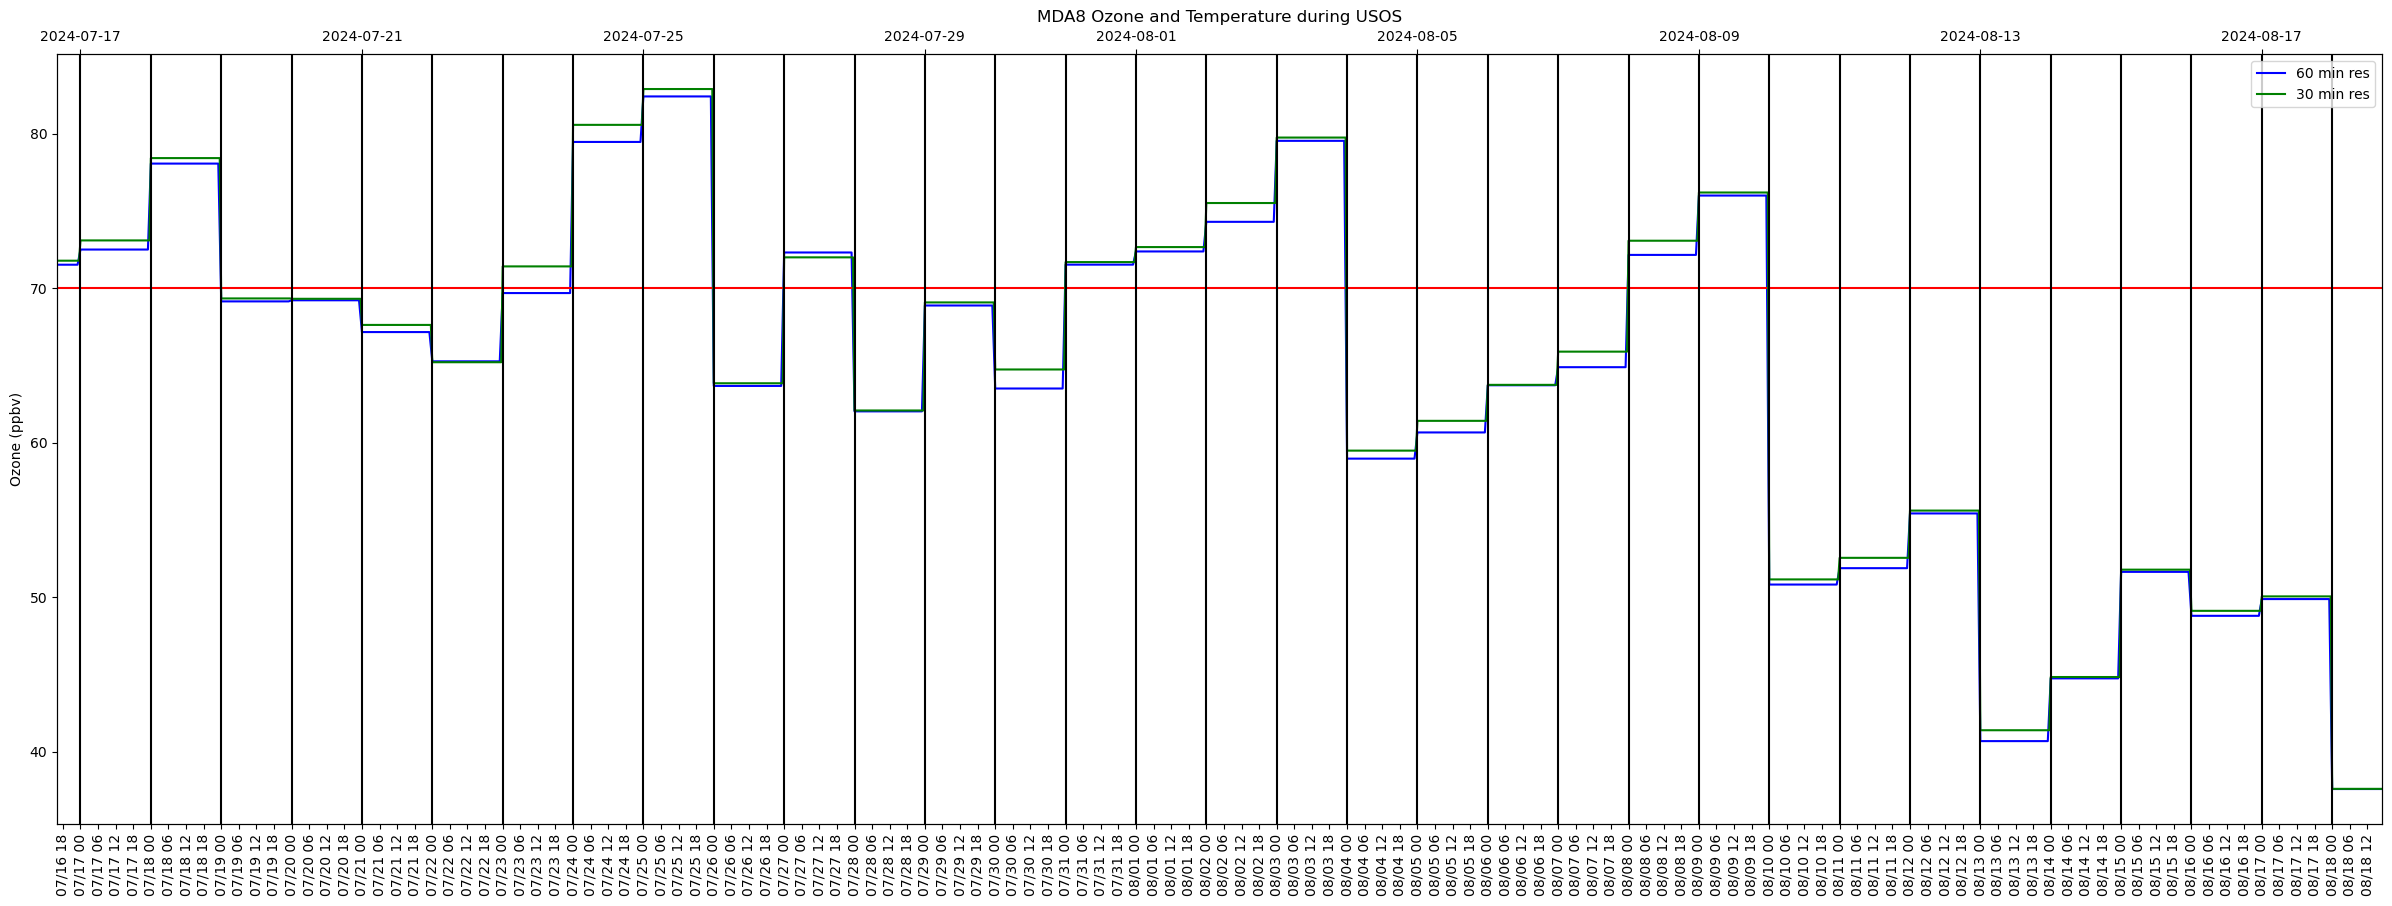

In [ ]:
fig, ax1 = plt.subplots(figsize = (30,10))

ax1.margins(x=0)

ax1.plot(df_adjuststart_hourly_ozone.index, df_adjuststart_hourly_ozone['MDA8_O3'], color='b', label = '60 min res')
#Set x-axis intervals
ozone_ticks_hourly = []
for ozone_tick_hourly_idx in range(2,len(df_adjuststart_hourly_ozone.index),6):
    ozone_ticks_hourly.append(df_adjuststart_hourly_ozone.index[ozone_tick_hourly_idx])
ax1.set_xticks(ozone_ticks_hourly)
ax1.set_xticklabels(df_adjuststart_hourly_ozone.index.strftime('%m/%d %H')[2::6], rotation = 90)

ax1.set_ylabel('Ozone (ppbv)')

ax1.hlines(y=70, xmin = df_adjuststart_hourly_ozone['MDA8_O3'].index[0], xmax = df_adjuststart_hourly_ozone['MDA8_O3'].index[793], color = 'r')

ax2 = ax1.twiny()

ax2.margins(x=0)
ax2.plot(df_adjuststart_30min_ozone.index, df_adjuststart_30min_ozone['MDA8_O3'], color='g', label = '30 min res')

# ozone_ticks_30min = []
# for ozone_tick_30min_idx in range(4,len(df_adjuststart_30min_ozone.index),12):
#     ozone_ticks_30min.append(df_adjuststart_30min_ozone.index[ozone_tick_30min_idx])
#ax2.set_xticks(ozone_ticks_30min)
#ax2.set_xticklabels(df_adjuststart_30min_ozone.index.strftime('%m/%d %H')[4::12], rotation = 90)
#ax2.set_ylabel('Ozone (ppbv)')
#ax2.set_axis_off()

midnight_vals_30min = []
for midnight_idx_30min in range(16,len(df_adjuststart_30min_ozone.index),48):
    midnight_vals_30min.append(df_adjuststart_30min_ozone.index[midnight_idx_30min])
for day_pos_30min in midnight_vals_30min:
    ax2.axvline(day_pos_30min, color = 'black')


# midnight_vals = []
# for midnight_idx in range(8,len(df_adjuststart_hourly_ozone.index),24):
#     midnight_vals.append(df_adjuststart_hourly_ozone.index[midnight_idx])
# for day_pos in midnight_vals:
#     plt.axvline(day_pos, color = 'black', linestyle = 'dotted')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.title('MDA8 Ozone and Temperature during USOS')

In [ ]:
#individual day merging instead of using the all dates merged file

all_ds=[]
for date_parked in smoke_free_days:
    file_path='/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/USOS_rev30min_Merged_Parked_2024'+ str(date_parked) +'.nc'
    # Load in the USOS 30min parked data on 1 day: 
    ds=xr.open_dataset(file_path)
    all_ds.append(ds)
combo_ds = xr.concat(all_ds, dim='time_UTC')

# Convert the Dataset to a DataFrame
df_all = combo_ds.to_dataframe()

# Setting local 'time' as the index 
df_all.set_index('time_local', inplace=True)

In [15]:
pd.set_option('display.max_seq_items', None)

In [60]:
df_foam_smokefree=pd.DataFrame(index=df_smokefree.index)

for col in vars2fill:
    if col in df_alldays.columns:
    # Everything that was a NaN or negative is assigned a 0, positive values are assigned a 1
        df_foam_smokefree[col] = np.where((df_smokefree[col] > 0) & (~df_smokefree[col].isna()), 1, 0 ) 
    else:
        df_foam_smokefree[col]= 0

df_transposed_smokefree=df_foam_smokefree.T

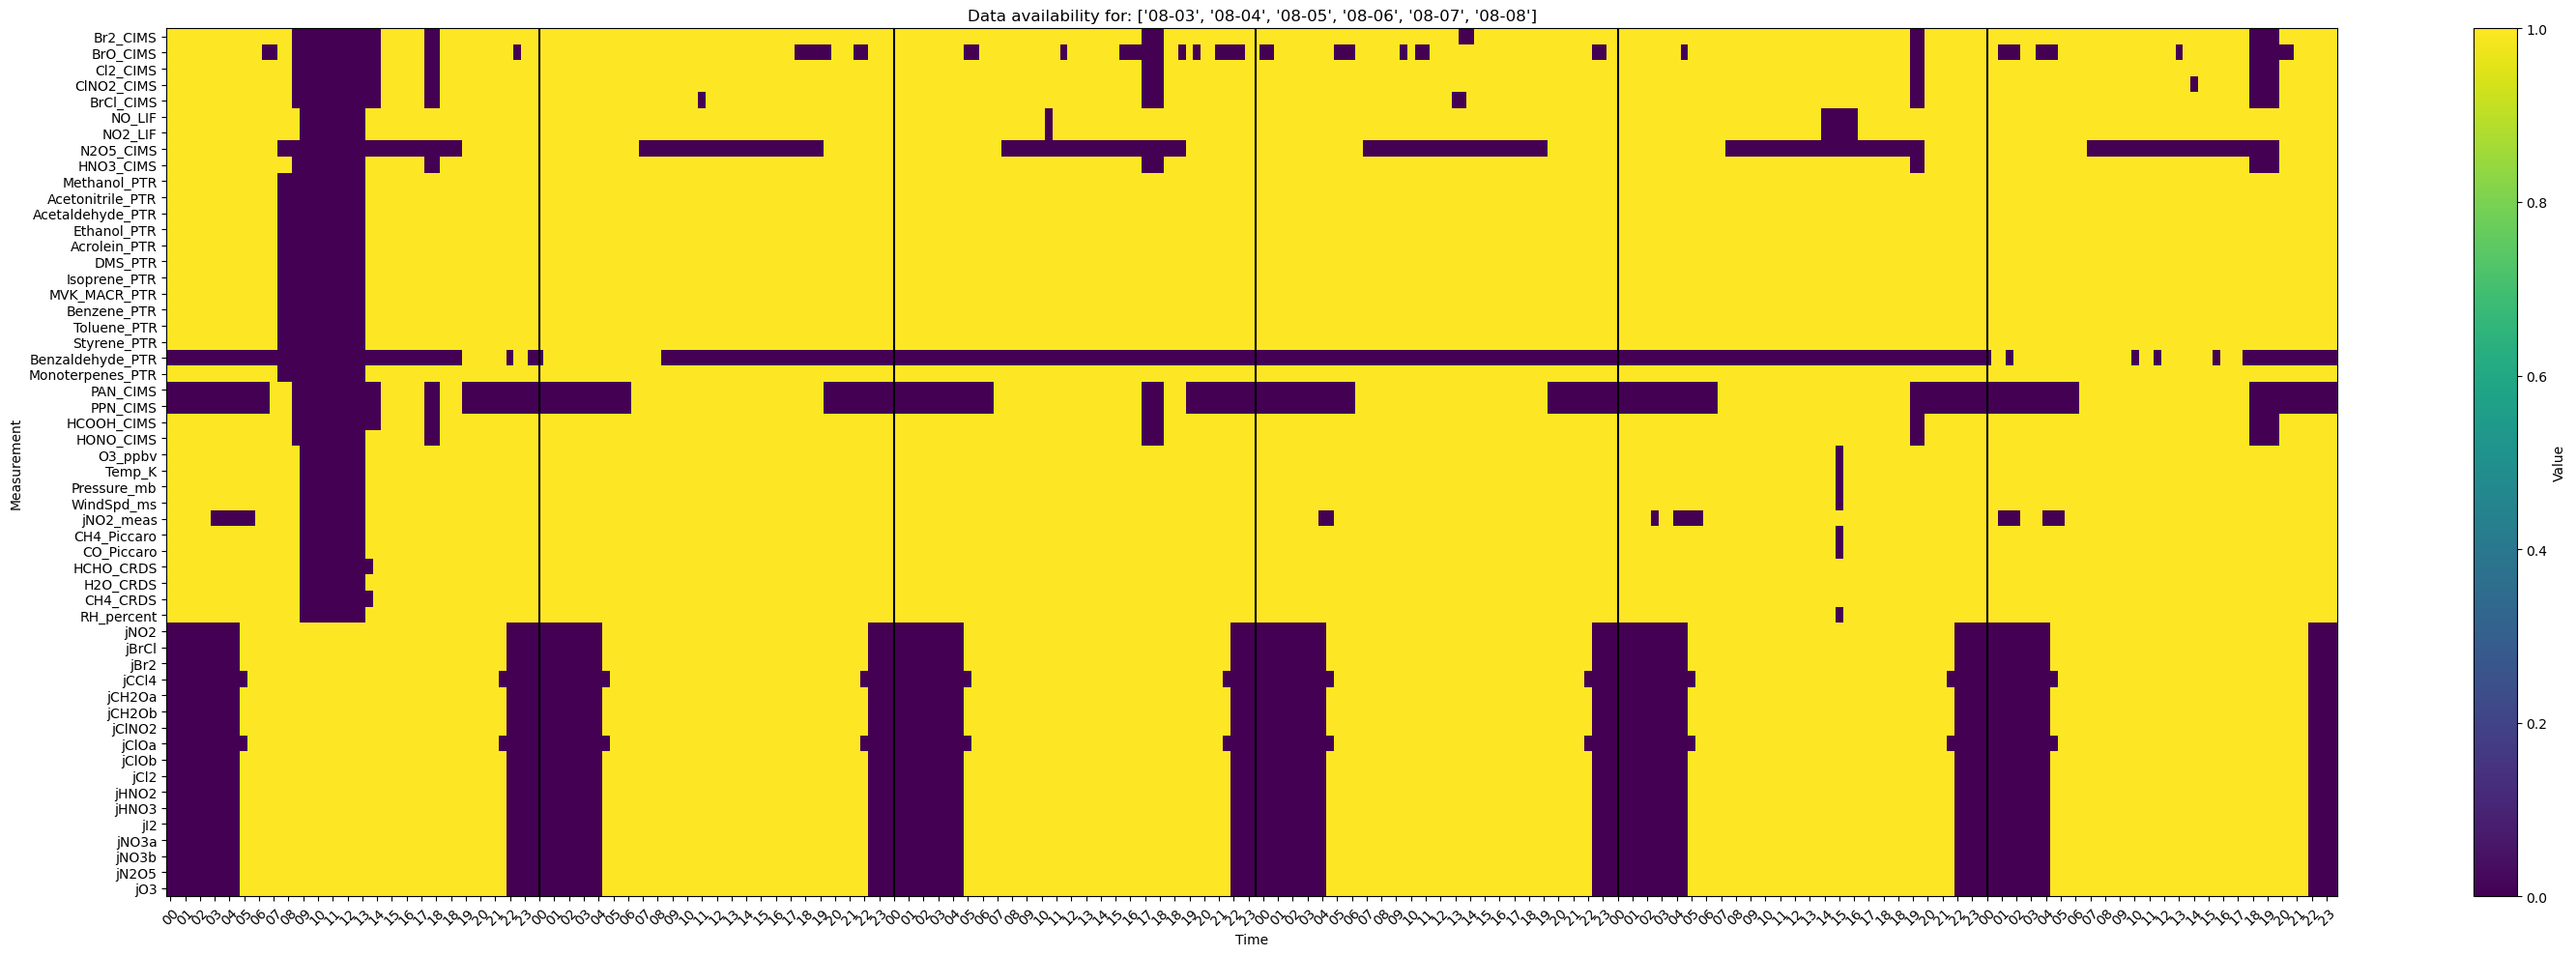

In [ ]:

# Create the heatmap using imshow
fig1 = plt.figure(figsize=(30, 10))
ax0 = fig1.add_subplot(111)
plt.imshow(df_transposed_smokefree, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_transposed_smokefree.columns),2), labels=df_transposed_smokefree.columns.strftime('%H')[0::2])
plt.yticks(ticks=np.arange(len(df_transposed_smokefree.index)), labels=df_transposed_smokefree.index)
            
# Add color bar
plt.colorbar(label='Value')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.title('Data availability for: ' + str(smoke_free_days))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))

---

---

# Viewing only one day's data availability (based on file for 0804)

In [ ]:
date_of_data = '0804'
file_path='/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/R0/CSL_MobileLab_Parked/merged/rev_30min/USOS_rev30min_Merged_Parked_2024'+ str(date_of_data) +'.nc'

# Load in the USOS 30min parked data on 1 day: 
ds=xr.open_dataset(file_path)

# Convert the Dataset to a DataFrame
df_onedate = ds.to_dataframe()

# Setting local 'time' as the index 
df_onedate.set_index('time_local', inplace=True)

# Define which variables we need to make sure don't have Nans/ negs since we'll be using then as constraints in F0AM: 
# True means constrain
need2fill= {'Br2_CIMS':True,
        'BrO_CIMS':True,
        'Cl2_CIMS':True,
        'ClNO2_CIMS':True,
        'BrCl_CIMS':True,
        'NCl3_CIMS':False,
        'File_Index':False,
        'NO_LIF':True,
        'NO2_LIF':True,
        'NOy_LIF':False,
        'ACCURACY_1sigma_NO':False,
        'ACCURACY_1sigma_NO2':False,
        'ACCURACY_1sigma_NOy':False,
        'N2O5_CIMS':True,
        'C4H7NO5_CIMS':False,
        'ISOPN_CIMS':False,
        'C5H10O3_CIMS':False,
        'C5H9NO5_CIMS':False,
        'C10H17NO4_CIMS':False,
        'HNO3_CIMS':True,
        'Methanol_PTR':True,
        'Acetonitrile_PTR':True,
        'Acetaldehyde_PTR':True,
        'Ethanol_PTR':True,
        'Methanethiol_PTR':False,
        'Acrolein_PTR':True,
        'Acetone_Propanal_PTR':False,
        'DMS_PTR':True,
        'Isoprene_PTR':True,
        'MVK_MACR_PTR':True,
        'Benzene_PTR':True,
        'Toluene_PTR':True,
        'Styrene_PTR':True,
        'Benzaldehyde_PTR':True,
        'C8Aromatics_PTR':False,
        'C9Aromatics_PTR':False,
        'Naphthalene_PTR':False,
        'Octanal_PTR':False,
        'Monoterpenes_PTR':True,
        'Nonanal_PTR':False,
        'C7H4ClF3_PTR':False,
        'D5_siloxane_PTR':False,
        'PAN_CIMS':True,
        'APAN_CIMS':False,
        'PPN_CIMS':True,
        'HCOOH_CIMS':True,
        'HONO_CIMS':True,
        'O3_ppbv':True,
        'Altitude_m':False,
        'Course_deg':False,
        'GndSpd_ms':False,
        'Heading_deg':False,
        'Lat':False,
        'Lon':False,
        'Temp_K':True,
        'Pressure_mb':True,
        'WindDir_deg':False,
        'WindSpd_ms':True,
        'jNO2_meas':True,
        'CO2_Piccaro':False,
        'CH4_Piccaro':True,
        'CO_Piccaro':True,
        'H2O_Piccaro':False,
        'HCHO_CRDS':True,
        'H2O_CRDS':True,
        'CH4_CRDS':True,
        'Time_Start_WAS':False,
        'Time_Stop_WAS':False,
        'Time_Mid_WAS':False,
        'Acetone_WAS':False,
        'Acrolein_WAS':False,
        'Benzene_WAS':False,
        'C2Cl4_WAS':False,
        'C2HCl3_WAS':False,
        'CCl4_WAS':False,
        'CF2Cl2_WAS':False,
        'CFCl3_WAS':False,
        'CH2Cl2_WAS':False,
        'CH3Br_WAS':False,
        'CycloPentane_WAS':False,
        'Ethyl_WAS':False,
        'Ethane_WAS':False,
        'Ethene_WAS':False,
        'Ethyne_WAS':False,
        'Furan_WAS':False,
        'Isoprene_WAS':False,
        'Limonene_WAS':False,
        'MACR_WAS':False,
        'MethylCycloHexane_WAS':False,
        'MethylCycloPentane_WAS':False,
        'Propane_WAS':False,
        'Propene_WAS':False,
        'Toluene_WAS':False,
        'Alpha_Pinene_WAS':False,
        'Beta_Pinene_WAS':False,
        'c2Butene_WAS':False,
        'c2Pentene_WAS':False,
        'iButane_WAS':False,
        'iPentane_WAS':False,
        'iPropylBenzene_WAS':False,
        'iPropylONO2_WAS':False,
        'm_p_Xylene_WAS':False,
        'nButane_WAS':False,
        'nDecane_WAS':False,
        'nHeptane_WAS':False,
        'nHexane_WAS':False,
        'nNonane_WAS':False,
        'nOctane_WAS':False,
        'nPentane_WAS':False,
        'nPropylBenzene_WAS':False,
        'nPropylONO2_WAS':False,
        'o_Xylene_WAS':False,
        't2Butene_WAS':False,
        't2Pentene_WAS':False,
        'x123_TriMethylBenzene_WAS':False,
        'x124_TriMethylBenzene_WAS':False,
        'x135_TriMethylBenzene_WAS':False,
        'x13_Butadiene_WAS':False,
        'x1_Butene_WAS':False,
        'x1_Pentene_WAS':False,
        'x224_TriMethylPentane_WAS':False,
        'x22_DiMethylButane_WAS':False,
        'x2_EthylToluene_WAS':False,
        'x2_MethylPentane_WAS':False,
        'x3_MethylPentane_WAS':False,
        'x3_x4_EthylToluene_WAS':False,
        'RH_percent':True,
        'AOD':False,
        'jNO2':True,
        'jBrCl':True,
        'jBr2':True,
        'jCCl4':True,
        'jCH2Oa':True,
        'jCH2Ob':True,
        'jClNO2':True,
        'jClOa':True,
        'jClOb':True,
        'jCl2':True,
        'jHNO2':True,
        'jHNO3':True,
        'jI2':True,
        'jNO3a':True,
        'jNO3b':True,
        'jN2O5':True,
        'jO3':True,
        'Time_Start_POPS':False,
        'Time_Stop_POPS':False,
        'Press_mb_POPS':False,
        'Temp_C_POPS':False,
        'Aerosol_conc_POPS':False,
        'Surface_area_conc_POPS':False,
        'Volume_density_POPS':False,
        'Effective_radius_POPS':False,
        'Extinction_POPS':False,
        'Particle_conc_bin01_POPS':False,
        'Particle_conc_bin02_POPS':False,
        'Particle_conc_bin03_POPS':False,
        'Particle_conc_bin04_POPS':False,
        'Particle_conc_bin05_POPS':False,
        'Particle_conc_bin06_POPS':False,
        'Particle_conc_bin07_POPS':False,
        'Particle_conc_bin08_POPS':False,
        'Particle_conc_bin09_POPS':False,
        'Particle_conc_bin10_POPS':False,
        'Particle_conc_bin11_POPS':False,
        'Particle_conc_bin12_POPS':False,
        'Particle_conc_bin13_POPS':False,
        'Particle_conc_bin14_POPS':False,
        'Particle_conc_bin15_POPS':False,
        'Particle_conc_bin16_POPS':False,
        'Particle_conc_bin17_POPS':False,
        'Particle_conc_bin18_POPS':False,
        'Particle_conc_bin19_POPS':False,
        'Particle_conc_bin20_POPS':False,
        'Particle_conc_bin21_POPS':False,
        'Particle_conc_bin22_POPS':False,
        'Particle_conc_bin23_POPS':False,
        'Particle_conc_bin24_POPS':False,
        'Particle_conc_bin25_POPS':False,
        'Particle_conc_bin26_POPS':False,
        'Particle_conc_bin27_POPS':False,
        'Particle_conc_bin28_POPS':False,
        'Particle_conc_bin29_POPS':False,
        'Particle_conc_bin30_POPS':False,
        'Particle_conc_bin31_POPS':False,
        'Particle_conc_bin32_POPS':False,
        'Particle_conc_bin33_POPS':False,
        'Particle_conc_bin34_POPS':False,
        'Particle_conc_bin35_POPS':False,
        'Particle_conc_bin36_POPS':False}

# Get names of vars we need to fill nans in: 
vars2fill=[key for key,value in need2fill.items() if value ==True]


In [ ]:
df_onedate_avail=pd.DataFrame(index=df_onedate.index)
for col in vars2fill:
    if col in df_onedate.columns:
    # Everything that was a NaN or negative is assigned a 0, positive values are assigned a 1
        df_onedate_avail[col] = np.where((df_onedate[col] > 0) & (~df_onedate[col].isna()), 1, 0 ) 
    else:
        df_onedate_avail[col]= 0
df_onedate_avail_transposed=df_onedate_avail.T

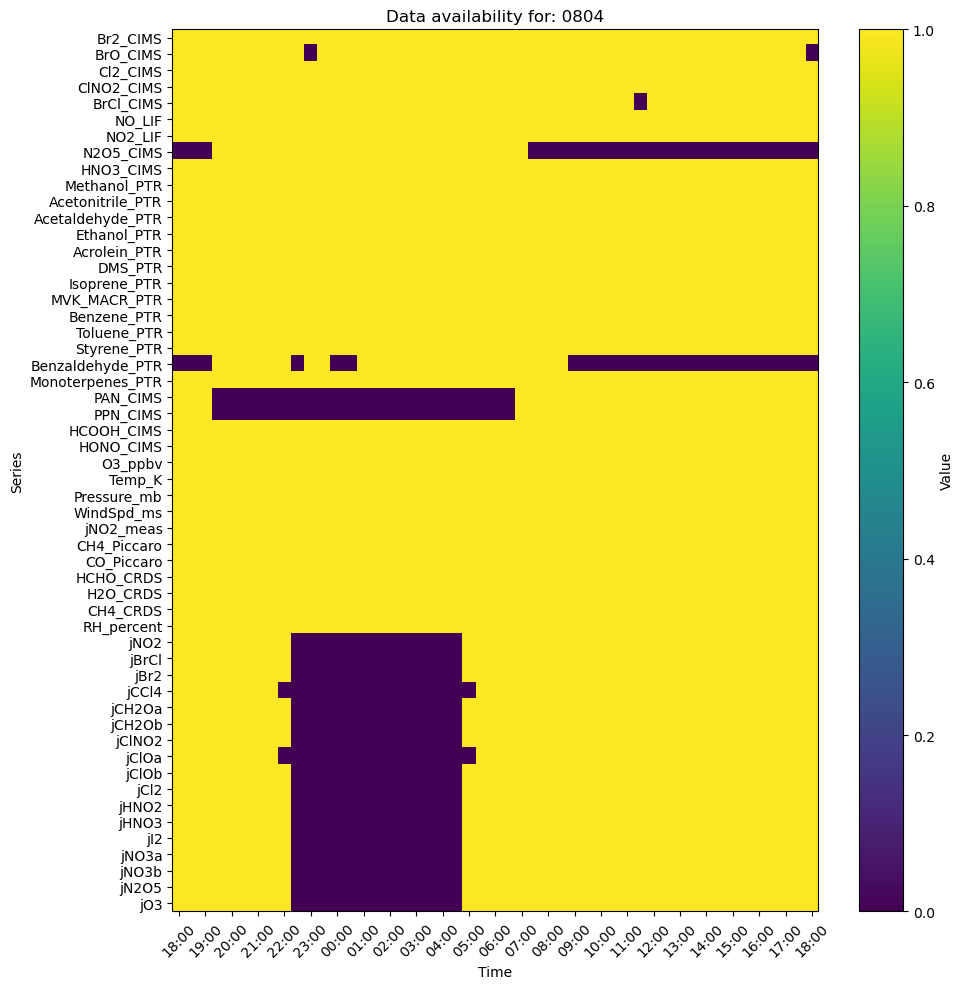

In [ ]:
# Create the heatmap using imshow
plt.figure(figsize=(10, 10))
plt.imshow(df_onedate_avail_transposed, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_onedate_avail_transposed.columns),2), labels=df_onedate_avail_transposed.columns.strftime('%H:%M')[0::2])
plt.yticks(ticks=np.arange(len(df_onedate_avail_transposed.index)), labels=df_onedate_avail_transposed.index)

# Add color bar
plt.colorbar(label='Value')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Series')
plt.title('Data availability for: ' + str(date_of_data))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# Check if we have the essential parameters for the one day

In [ ]:
essential_vars_to_fill = {'O3_ppbv':True,
    'NO_LIF':True, 
    'NO2_LIF':True, 
    'Temp_K':True, 
    'Pressure_mb':True, 
    'RH_percent':True, 
    'Isoprene_PTR':True, 
    'Monoterpenes_PTR':True, 
    'Benzene_PTR':True, 
    'Toluene_PTR':True, 
    'MVK_MACR_PTR':True, 
    'HCHO_CRDS':True}
part_vars2fill=[key for key,value in essential_vars_to_fill.items() if value ==True]

In [ ]:
df_essentials_onedate=pd.DataFrame(index=df_onedate.index)

for col in part_vars2fill:
    if col in df_onedate.columns:
    # Everything that was a NaN or negative is assigned a 0, positive values are assigned a 1
        df_essentials_onedate[col] = np.where((df_onedate[col] > 0) & (~df_onedate[col].isna()), 1, 0 ) 
    else:
        df_essentials_onedate[col]= 0

df_essentials_transposed=df_essentials_onedate.T

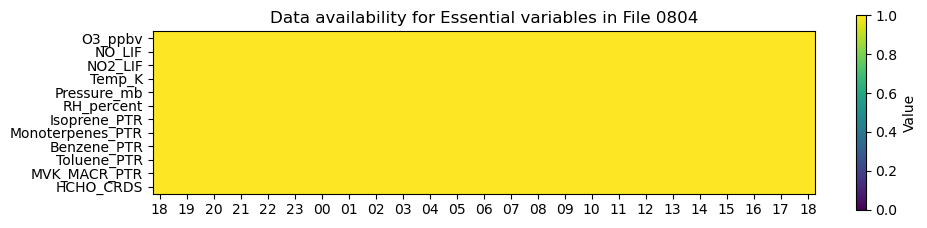

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(df_essentials_transposed, cmap = 'viridis', vmin=0,vmax=1)

fig.colorbar(im,ax=ax, label = 'Value',shrink=0.2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_xticks(range(0,len(df_essentials_transposed.columns),2))
ax.set_xticklabels(df_essentials_transposed.columns.strftime('%H')[0::2])

ax.set_yticks(ticks=np.arange(len(df_essentials_transposed.index)))
ax.set_yticklabels(df_essentials_transposed.index)
ax.set_title('Data availability for Essential variables in File 0804')
fig.tight_layout()

plt.show()


# Check essentials availability for subset

In [19]:
subset_days = ['08-03','08-04','08-05','08-06','08-07','08-08']
df_subsetdays = df_alldays.sort_index().loc["2024-08-03":"2024-08-08"]
df_subset_avail_essentials=pd.DataFrame(index=df_subsetdays.index)

essential_vars_to_fill = {'O3_ppbv':True,
    'NO_LIF':True, 
    'NO2_LIF':True, 
    'Temp_K':True, 
    'Pressure_mb':True, 
    'RH_percent':True, 
    'Isoprene_PTR':True, 
    'Monoterpenes_PTR':True, 
    'Benzene_PTR':True, 
    'Toluene_PTR':True, 
    'MVK_MACR_PTR':True, 
    'HCHO_CRDS':True}

part_vars2fill=[key for key,value in essential_vars_to_fill.items() if value ==True]

In [20]:
for col in part_vars2fill:
    if col in df_subsetdays.columns:
    # Everything that was a NaN or negative is assigned a 0, positive values are assigned a 1
        df_subset_avail_essentials[col] = np.where((df_subsetdays[col] > 0) & (~df_subsetdays[col].isna()), 1, 0 ) 
    else:
        df_subset_avail_essentials[col]= 0

df_subset_essentials_transposed=df_subset_avail_essentials.T


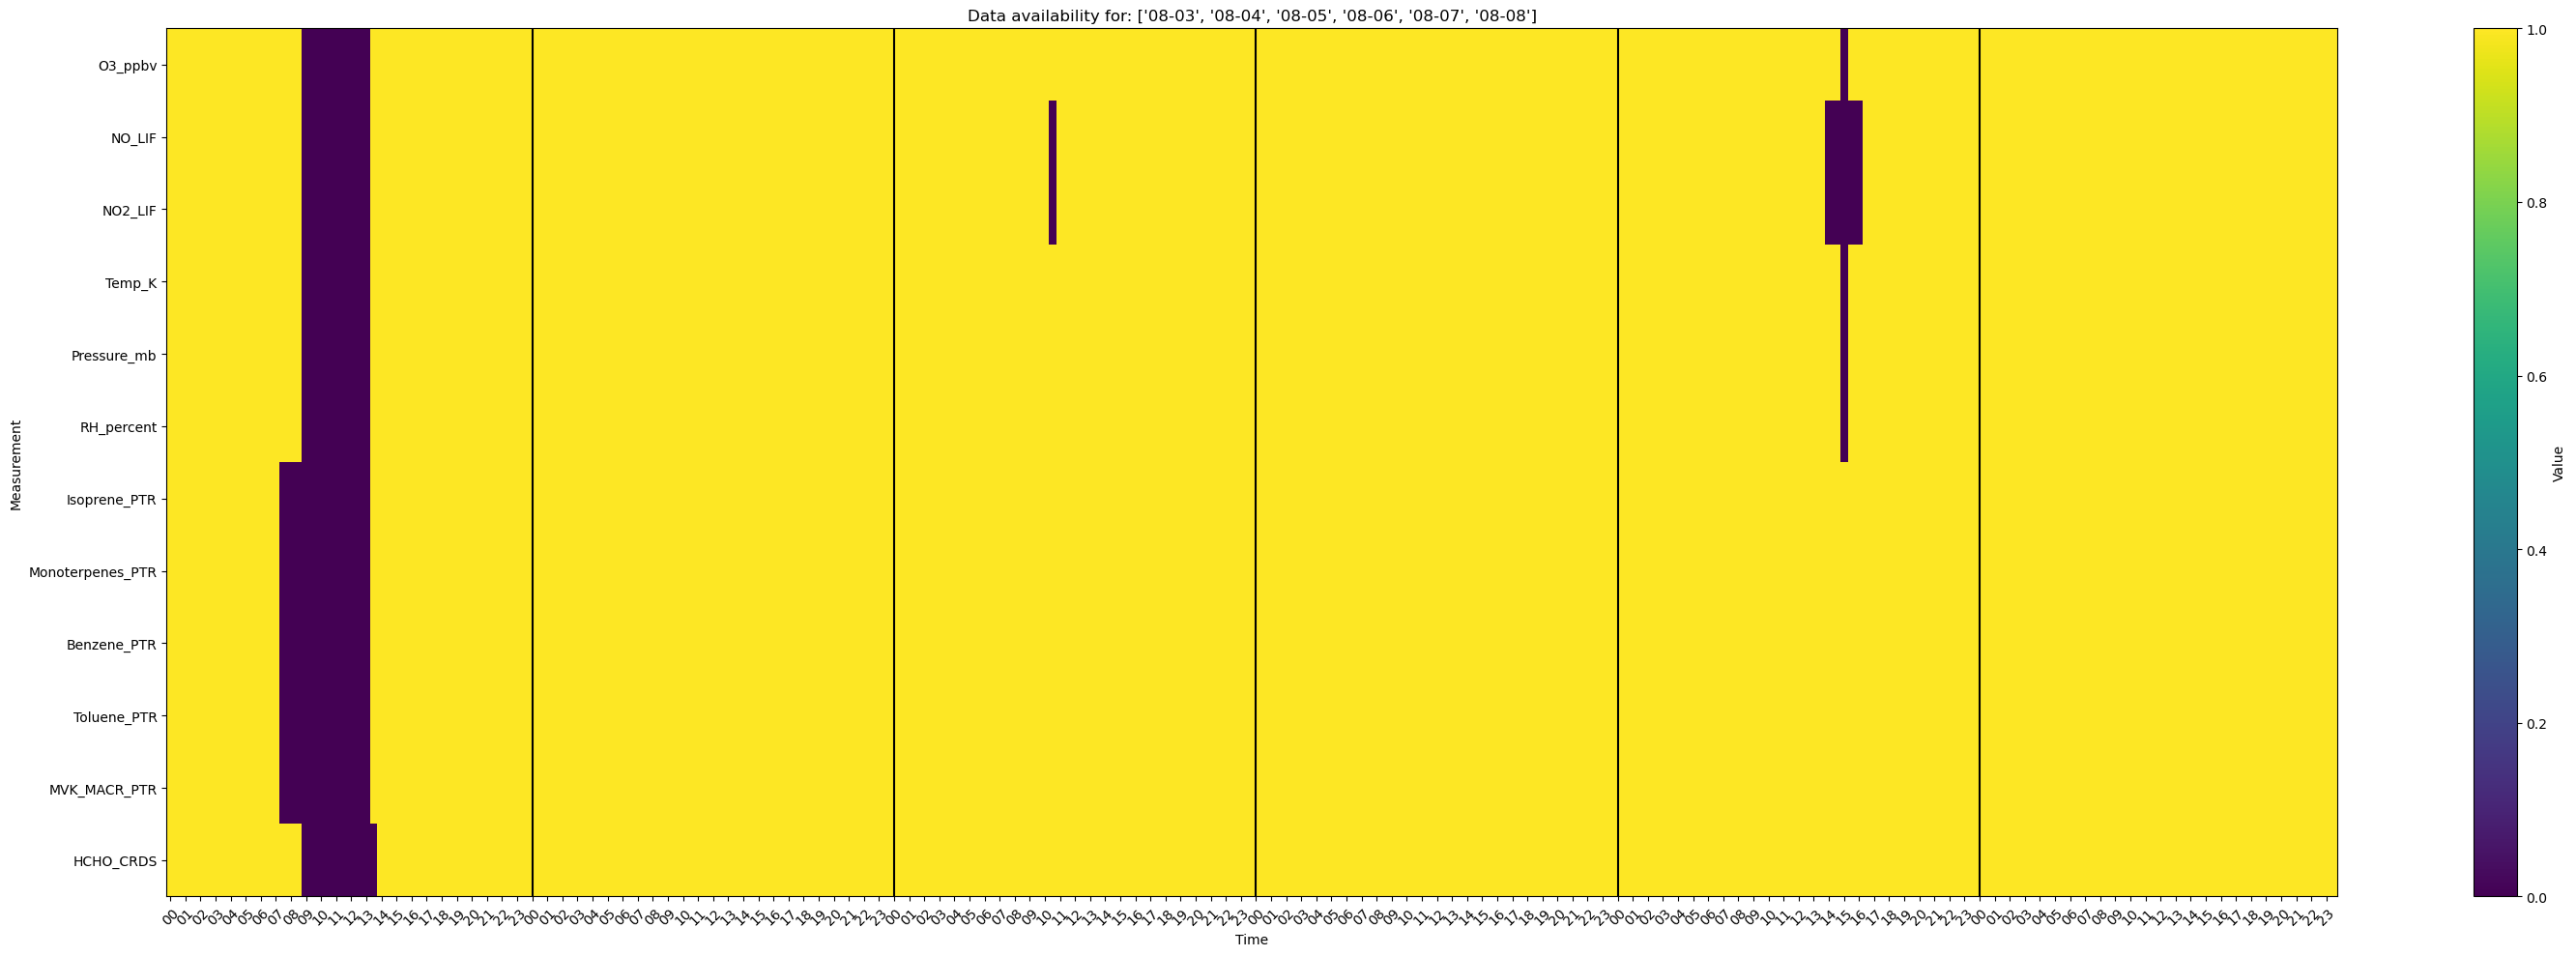

In [21]:
# Create the heatmap using imshow
fig1 = plt.figure(figsize=(30, 10))
ax0 = fig1.add_subplot(111)
plt.imshow(df_subset_essentials_transposed, aspect='auto', cmap='viridis')

# Set x-ticks and y-ticks
plt.xticks(ticks=range(0,len(df_subset_essentials_transposed.columns),2), labels=df_subset_essentials_transposed.columns.strftime('%H')[0::2])
plt.yticks(ticks=np.arange(len(df_subset_essentials_transposed.index)), labels=df_subset_essentials_transposed.index)

for pos in range(48,len(df_subset_essentials_transposed.columns),48):
    plt.axvline(pos, color = 'black')
            
# Add color bar
plt.colorbar(label='Value')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.title('Data availability for: ' + str(subset_days))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#save_filepath_merger = '/uufs/chpc.utah.edu/common/home/haskins-group1/users/vsun/USOS_merges/data_availability_plots/three_day_availability_'+ str(date_to_plot) + '.png'
#plt.savefig(fname = save_filepath_merger,format='png')
#print('Saved figure as:' + str(save_filepath_merger))